In [161]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [162]:
### Direct to the correct folder
path = 'D:/files/second_part/OLST_gait_csv_dataset'
filenames = os.listdir(path)   ### List the files name in the folder
sub_id = []                    ### Initialize the subject name list
value_list = []               ### Initialzie the value list

### Organize the information into different list and then integrate them together as a dataframe
for sub in filenames:
    curr_file = path + '/' + sub
    curr_csv = pd.read_csv(curr_file)
    value = list(curr_csv.loc[0])
    value_list.append(value)
    ID = str(curr_csv["sub_ID"][0]) ### -25: sub0?, -4: remove .csv
    sub_id.append(ID)
            
print("Current subject number: " + str(len(sub_id)) + '\n' + "Current features number: " + str(len(value)))

Current subject number: 241
Current features number: 71


In [163]:
### Create the correct columns name
col_names = list(curr_csv.columns)
all_col_names = ["sub_ID"] + col_names

In [164]:
### Create the correct metrix which is going to be convert to dataframe
all_list = []
for i in range(len(sub_id)):
    v = [(sub_id[i])] + value_list[i]
    all_list.append(v)

In [165]:
raw_df = pd.DataFrame(all_list, columns = all_col_names)
df = raw_df.iloc[:, 1:]

In [166]:
df["std_AP_aCOM"]

0      15830.5999
1      15306.2527
2      18459.2484
3      14506.0201
4      19180.5263
          ...    
236    21904.4676
237    52510.0504
238    22244.0894
239    13753.5089
240    32612.1199
Name: std_AP_aCOM, Length: 241, dtype: float64

## Checking dataset quality

* balance between group
* data type
* abnormal value because of the extraction from matlab 
* missing data
* outlier

In [167]:
print("In total " + str(df.shape[0]) + " steps")

In total 241 steps


In [168]:
df.groupby("target_performance").size()

target_performance
Bad          60
Good         75
Moderate    106
dtype: int64

In [169]:
for i in df.columns:
    if df[i].dtypes != "float64":
        print(i)

sub_ID
target_performance


In [170]:
df.describe().loc[["count", "mean", "std", "min", "max"],:]

,std_AP_COM,std_ML_COM,std_vretical_COM,ROM_AP_COM,ROM_ML_COM,std_AP_vCOM,std_ML_vCOM,std_vretical_vCOM,max_AP_vCOM,max_ML_vCOM,...,min_AP_MOS,min_ML_MOS,ROM_AP_MOS,ROM_ML_MOS,mean_AP_IA,mean_ML_IA,std_AP_IA,std_ML_IA,ROM_AP_IA,ROM_ML_IA
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,...,241.000000,241.000000,241.000000,241.00000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,183.011841,7.337493,10.504911,628.115020,26.162795,154.988559,180.735989,278.708132,2706.577666,338.945764,...,-792.463270,-109.375228,541.275347,202.58136,2.239946,0.032577,6.380981,1.764634,22.902111,7.162952
std,15.642787,2.189469,1.657843,53.197668,7.421000,36.558502,37.891742,62.323288,697.255268,112.137548,...,238.386359,30.497901,192.731668,43.73619,4.422622,3.346131,1.670975,0.820178,6.009231,3.232431
min,47.318500,1.777500,6.103200,154.469900,5.807700,59.422600,103.879200,175.537000,1999.296700,126.288700,...,-1259.280500,-197.675400,194.872600,38.40730,-14.165100,-6.253400,0.000000,0.000000,0.000000,0.000000
max,236.436200,13.906600,16.934200,736.219100,48.386700,339.269300,354.894500,687.293400,7152.725700,801.743300,...,-268.374300,-34.731100,867.059700,316.31990,31.591200,5.360600,12.584200,4.481400,39.980900,12.768000


In [171]:
### fill the missing data with average
new_df = df.drop(["sub_ID", "target_performance"], axis = 1)
df_without_na = df.copy()
for col in new_df.columns:
    if df[col].isna().sum() != 0:
        df_without_na[col] = df_without_na[col].fillna(df[col].mean())
print("Amount of nan in original table: " + str(df.isna().sum().sum()) + '\n' + "Amount of nan in current table: " + str(df_without_na.isna().sum().sum()))

Amount of nan in original table: 45
Amount of nan in current table: 0


In [172]:
df_without_na[round(df_without_na["std_AP_IA"]) == 0]

,sub_ID,std_AP_COM,std_ML_COM,std_vretical_COM,ROM_AP_COM,ROM_ML_COM,std_AP_vCOM,std_ML_vCOM,std_vretical_vCOM,max_AP_vCOM,...,min_ML_MOS,ROM_AP_MOS,ROM_ML_MOS,mean_AP_IA,mean_ML_IA,std_AP_IA,std_ML_IA,ROM_AP_IA,ROM_ML_IA,target_performance
51,sub03__04,187.8497,5.9262,8.7644,646.6054,19.6323,129.2911,181.9555,255.0872,3107.6748,...,-119.5384,513.2342,230.6637,4.9985,1.9317,0.47198,0.21478,0.66748,0.30374,Bad
130,sub10__04,180.3817,9.2276,11.9738,617.6650,32.4012,141.7605,201.9271,310.6406,2908.2211,...,-195.1219,653.0987,284.3937,11.6780,1.2813,0.00000,0.00000,0.00000,0.00000,Moderate


In [173]:
df_without_na[round(df_without_na["std_AP_IA"]) == 0]

,sub_ID,std_AP_COM,std_ML_COM,std_vretical_COM,ROM_AP_COM,ROM_ML_COM,std_AP_vCOM,std_ML_vCOM,std_vretical_vCOM,max_AP_vCOM,...,min_ML_MOS,ROM_AP_MOS,ROM_ML_MOS,mean_AP_IA,mean_ML_IA,std_AP_IA,std_ML_IA,ROM_AP_IA,ROM_ML_IA,target_performance
51,sub03__04,187.8497,5.9262,8.7644,646.6054,19.6323,129.2911,181.9555,255.0872,3107.6748,...,-119.5384,513.2342,230.6637,4.9985,1.9317,0.47198,0.21478,0.66748,0.30374,Bad
130,sub10__04,180.3817,9.2276,11.9738,617.6650,32.4012,141.7605,201.9271,310.6406,2908.2211,...,-195.1219,653.0987,284.3937,11.6780,1.2813,0.00000,0.00000,0.00000,0.00000,Moderate


In [174]:
df_without_outlier = df_without_na.drop(130, axis = 0)

In [175]:
df_without_outlier.describe().loc[["count", "mean", "std", "min", "max"],:]

,std_AP_COM,std_ML_COM,std_vretical_COM,ROM_AP_COM,ROM_ML_COM,std_AP_vCOM,std_ML_vCOM,std_vretical_vCOM,max_AP_vCOM,max_ML_vCOM,...,min_AP_MOS,min_ML_MOS,ROM_AP_MOS,ROM_ML_MOS,mean_AP_IA,mean_ML_IA,std_AP_IA,std_ML_IA,ROM_AP_IA,ROM_ML_IA
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,183.022800,7.329617,10.498790,628.158562,26.136802,155.043676,180.647693,278.575080,2705.737485,339.045687,...,-791.185790,-109.017950,540.809416,202.240475,2.200621,0.027374,6.407569,1.771987,22.997536,7.192798
std,15.674551,2.190622,1.658577,53.304540,7.425506,36.624869,37.946078,62.419227,698.590178,112.361148,...,238.056471,30.051987,192.998389,43.505585,4.333143,3.309955,1.600834,0.803453,5.757748,3.164561
min,47.318500,1.777500,6.103200,154.469900,5.807700,59.422600,103.879200,175.537000,1999.296700,126.288700,...,-1259.280500,-197.675400,194.872600,38.407300,-14.165100,-6.253400,0.471980,0.039062,0.667480,0.154270
max,236.436200,13.906600,16.934200,736.219100,48.386700,339.269300,354.894500,687.293400,7152.725700,801.743300,...,-268.374300,-34.731100,867.059700,316.319900,31.591200,5.360600,12.584200,4.481400,39.980900,12.768000


In [176]:
df_without_outlier.head()

,sub_ID,std_AP_COM,std_ML_COM,std_vretical_COM,ROM_AP_COM,ROM_ML_COM,std_AP_vCOM,std_ML_vCOM,std_vretical_vCOM,max_AP_vCOM,...,min_ML_MOS,ROM_AP_MOS,ROM_ML_MOS,mean_AP_IA,mean_ML_IA,std_AP_IA,std_ML_IA,ROM_AP_IA,ROM_ML_IA,target_performance
0,sub01_1_1,210.5931,10.6657,12.8999,732.7649,38.2360,150.0072,191.5211,286.9676,2450.1928,...,-95.1634,545.3893,209.0092,2.229500,4.2958,7.5881,2.0198,28.7158,11.5740,Good
1,sub01_1_1,207.8487,6.7341,12.1225,720.6681,24.3892,160.0424,182.5252,274.9040,2395.4242,...,-112.7457,346.3114,225.2067,-0.027348,-4.2253,7.6452,2.1762,28.5913,10.7423,Good
2,sub01_1_1,202.9061,8.9849,11.5973,704.7750,32.2851,156.7007,165.6771,253.6074,2198.6575,...,-117.1395,782.9608,204.8036,17.889500,-6.2534,2.4406,1.1732,7.5086,3.9623,Good
3,sub01_1_2,205.9618,8.5317,13.0186,715.1603,31.8307,130.2983,211.5401,327.7559,3130.0437,...,-118.9072,373.0568,244.9530,-0.658200,4.1111,6.8559,1.9836,25.2243,11.1154,Good
4,sub01_1_2,208.3565,9.1125,11.9809,723.4165,32.0106,174.1993,161.0321,298.2240,3245.3569,...,-119.3812,822.7327,221.8411,2.389200,-4.1307,7.7554,2.0469,29.5651,10.3959,Good


In [177]:
df_without_outlier.columns

Index(['sub_ID', 'std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
       'std_AP_aCOM', 'std_ML_aCOM', 'std_vretical_aCOM', 'max_AP_aCOM',
       'max_ML_aCOM', 'ROM_AP_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance',
       'std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 'std_AP_vCOP',
       'std_ML_vCOP', 'max_AP_vCOP', 'max_ML_vCOP', 'ROM_AP_vCOP',
       'ROM_ML_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'max_AP_aCOP',
       'max_ML_aCOP', 'ROM_AP_aCOP', 'ROM_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',

In [178]:
from sklearn import preprocessing
normalized_df = pd.DataFrame()
for col in df_without_outlier.columns[:]:
    try:
        normalized_df[col] = preprocessing.normalize(np.array(df_without_outlier[col]).reshape(1, -1))[0]
    except:
        normalized_df[col] = df_without_outlier[col]

In [179]:
#normalized_df

In [180]:
all_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
       'std_AP_aCOM', 'std_ML_aCOM', 'std_vretical_aCOM', 'max_AP_aCOM',
       'max_ML_aCOM', 'ROM_AP_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance',
       'std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 'std_AP_vCOP',
       'std_ML_vCOP', 'max_AP_vCOP', 'max_ML_vCOP', 'ROM_AP_vCOP',
       'ROM_ML_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'max_AP_aCOP',
       'max_ML_aCOP', 'ROM_AP_aCOP', 'ROM_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',
       'max_AP_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_AP_MOS',
       'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'ROM_AP_IA', 'ROM_ML_IA', 'target_performance']]
spatiotemporal_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
       'std_AP_aCOM', 'std_ML_aCOM', 'std_vretical_aCOM', 'max_AP_aCOM',
       'max_ML_aCOM', 'ROM_AP_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance', 'target_performance'
       ]]
COP_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 'std_AP_vCOP',
       'std_ML_vCOP', 'max_AP_vCOP', 'max_ML_vCOP', 'ROM_AP_vCOP',
       'ROM_ML_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'max_AP_aCOP',
       'max_ML_aCOP', 'ROM_AP_aCOP', 'ROM_ML_aCOP', 'target_performance'
       ]]
advanced_df = df_without_outlier[['std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',
       'max_AP_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_AP_MOS',
       'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'ROM_AP_IA', 'ROM_ML_IA', 'target_performance'
       ]]

In [181]:
#x = spatiotemporal_df[spatiotemporal_df["std_AP_aCOM"] < 60000]["std_AP_aCOM"]
#x.hist()

In [182]:
#fig = plt.figure(figsize = (15,25))
#ax = fig.gca()
#spatiotemporal_df.hist(ax = ax)

In [183]:
#fig = plt.figure(figsize = (15,25))
#ax = fig.gca()
#COP_df.hist(ax = ax)

In [184]:
#fig = plt.figure(figsize = (15,25))
#ax = fig.gca()
#advanced_df.hist(ax = ax)

In [185]:
#fig = plt.figure(figsize = (15,25))
#ax = fig.gca()
#spatiotemporal_clear_df.hist(ax = ax)

In [186]:
all_clear_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
        'std_ML_aCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance', 'std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 
       'std_ML_vCOP', 'max_ML_vCOP', 'ROM_ML_vCOP', 'std_ML_aCOP', 'max_ML_aCOP', 'ROM_AP_aCOP','std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',
       'max_AP_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_AP_MOS',
       'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'ROM_AP_IA', 'ROM_ML_IA','target_performance']]
spatiotemporal_clear_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
        'std_ML_aCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance', 'target_performance'
       ]]
COP_clear_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 
       'std_ML_vCOP', 'max_ML_vCOP', 'ROM_ML_vCOP', 'std_ML_aCOP', 'max_ML_aCOP', 'ROM_AP_aCOP', 'target_performance'
       ]]
advanced_clear_df = df_without_outlier[['std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',
       'max_AP_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_AP_MOS',
       'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'ROM_AP_IA', 'ROM_ML_IA', 'target_performance'
       ]]

## Statistical analysis

In [187]:
corr_df = spatiotemporal_df.corr()
high_corr_df = corr_df[corr_df > 0.8].fillna(0)
mid_corr_df_1 = corr_df[corr_df < 0.8]
mid_corr_df = mid_corr_df_1[corr_df > 0.5].fillna(0)
low_corr_df = corr_df[corr_df < 0.5].fillna(0)

Text(0.5, 1.0, 'high correlation variable')

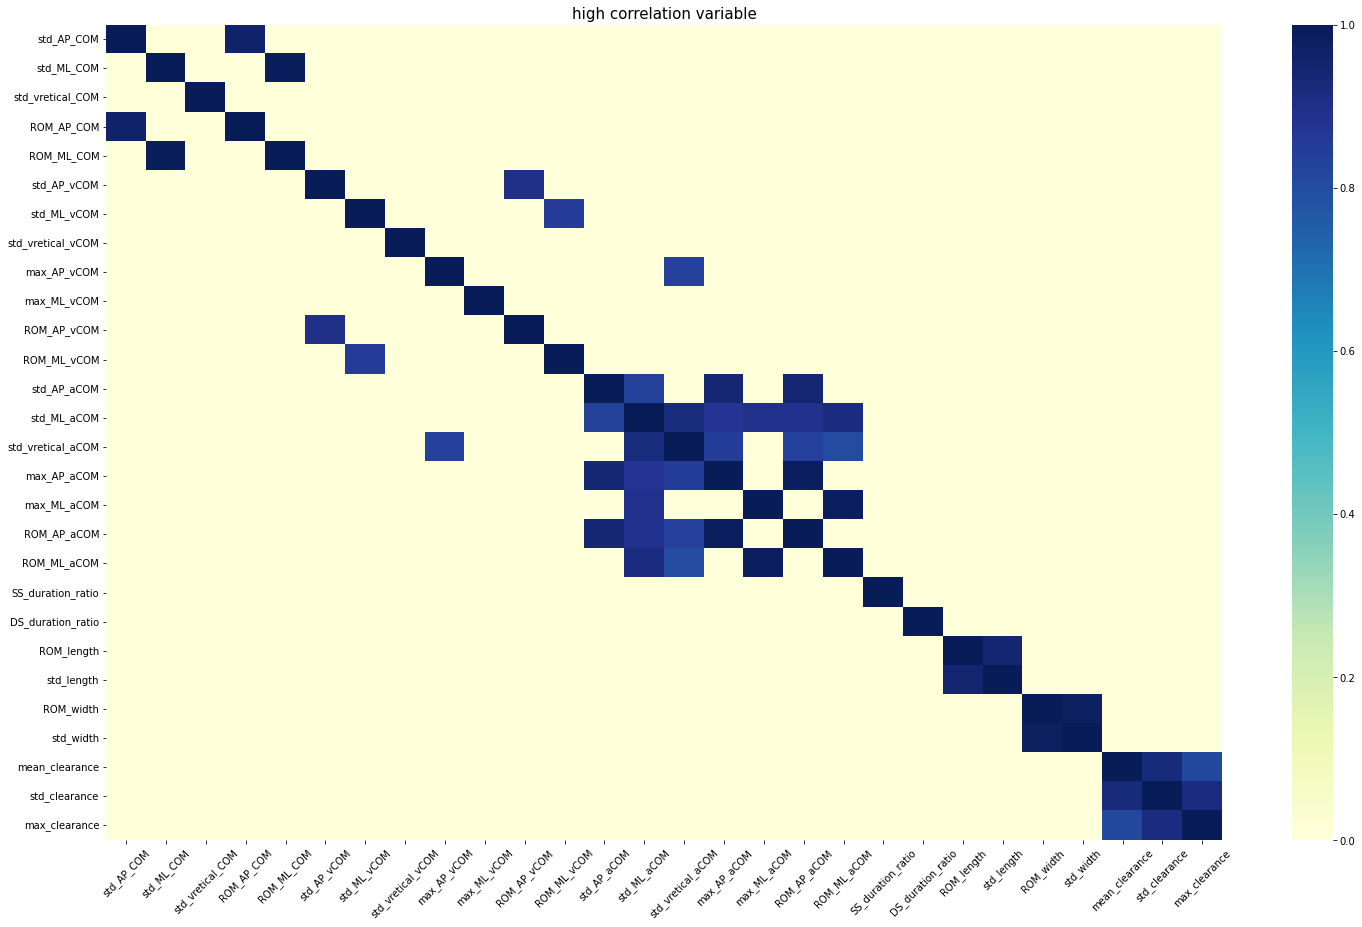

In [188]:
import seaborn as sns

fig = plt.figure(figsize = (25,15))
sns.heatmap(high_corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('high correlation variable', fontsize = 15)

In [189]:
corr_df = COP_clear_df.corr()
high_corr_df = corr_df[corr_df > 0.9].fillna(0)
mid_corr_df_1 = corr_df[corr_df < 0.9]
mid_corr_df = mid_corr_df_1[corr_df > 0.5].fillna(0)
low_corr_df = corr_df[corr_df < 0.5].fillna(0)

Text(0.5, 1.0, 'high correlation variable')

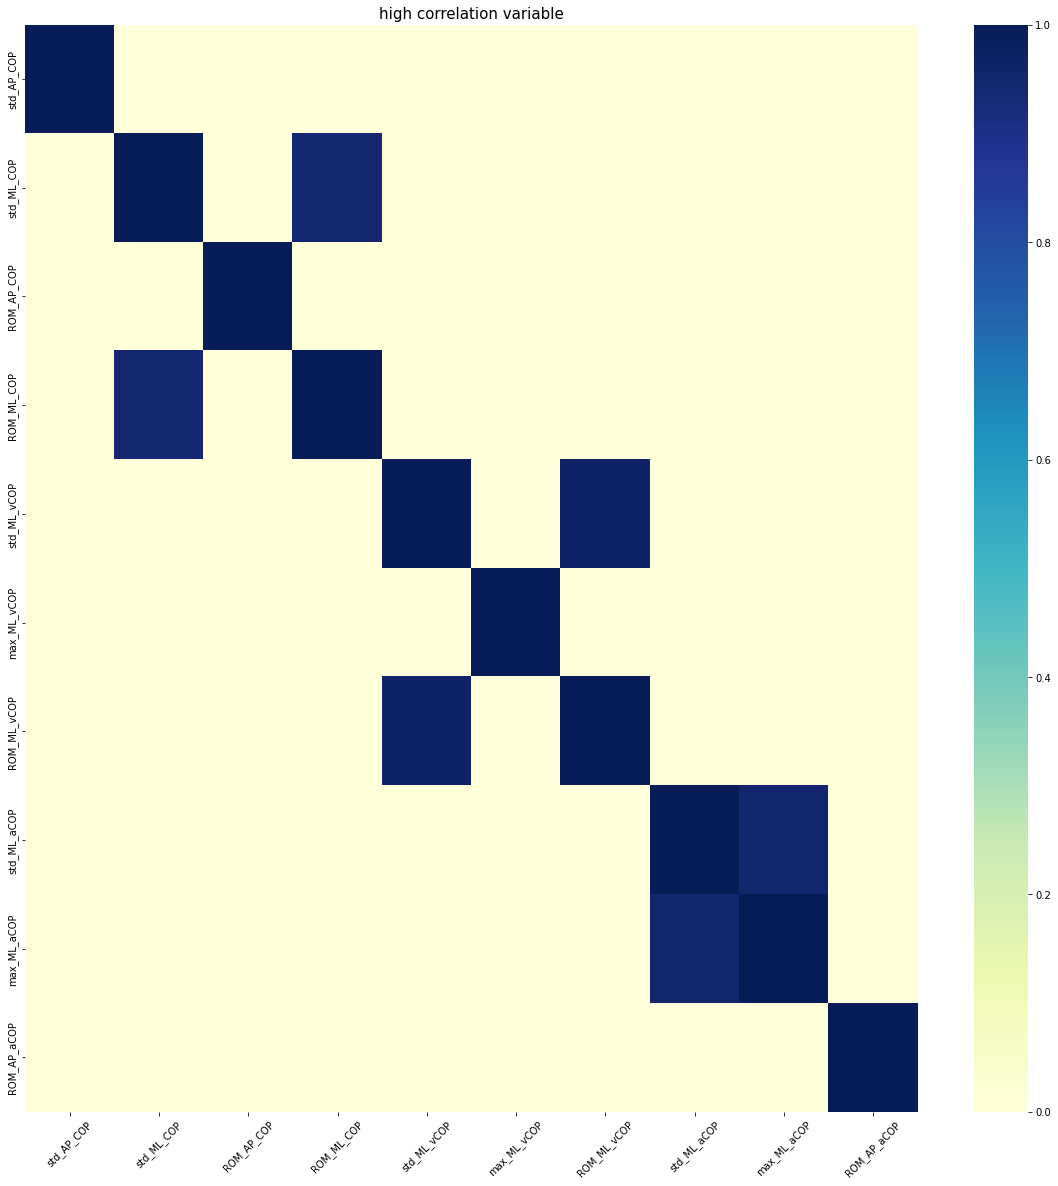

In [190]:
import seaborn as sns

fig = plt.figure(figsize = (20,20))
sns.heatmap(high_corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('high correlation variable', fontsize = 15)

In [191]:
corr_df = advanced_clear_df.corr()
high_corr_df = corr_df[corr_df > 0.9].fillna(0)
mid_corr_df_1 = corr_df[corr_df < 0.9]
mid_corr_df = mid_corr_df_1[corr_df > 0.5].fillna(0)
low_corr_df = corr_df[corr_df < 0.5].fillna(0)

Text(0.5, 1.0, 'high correlation variable')

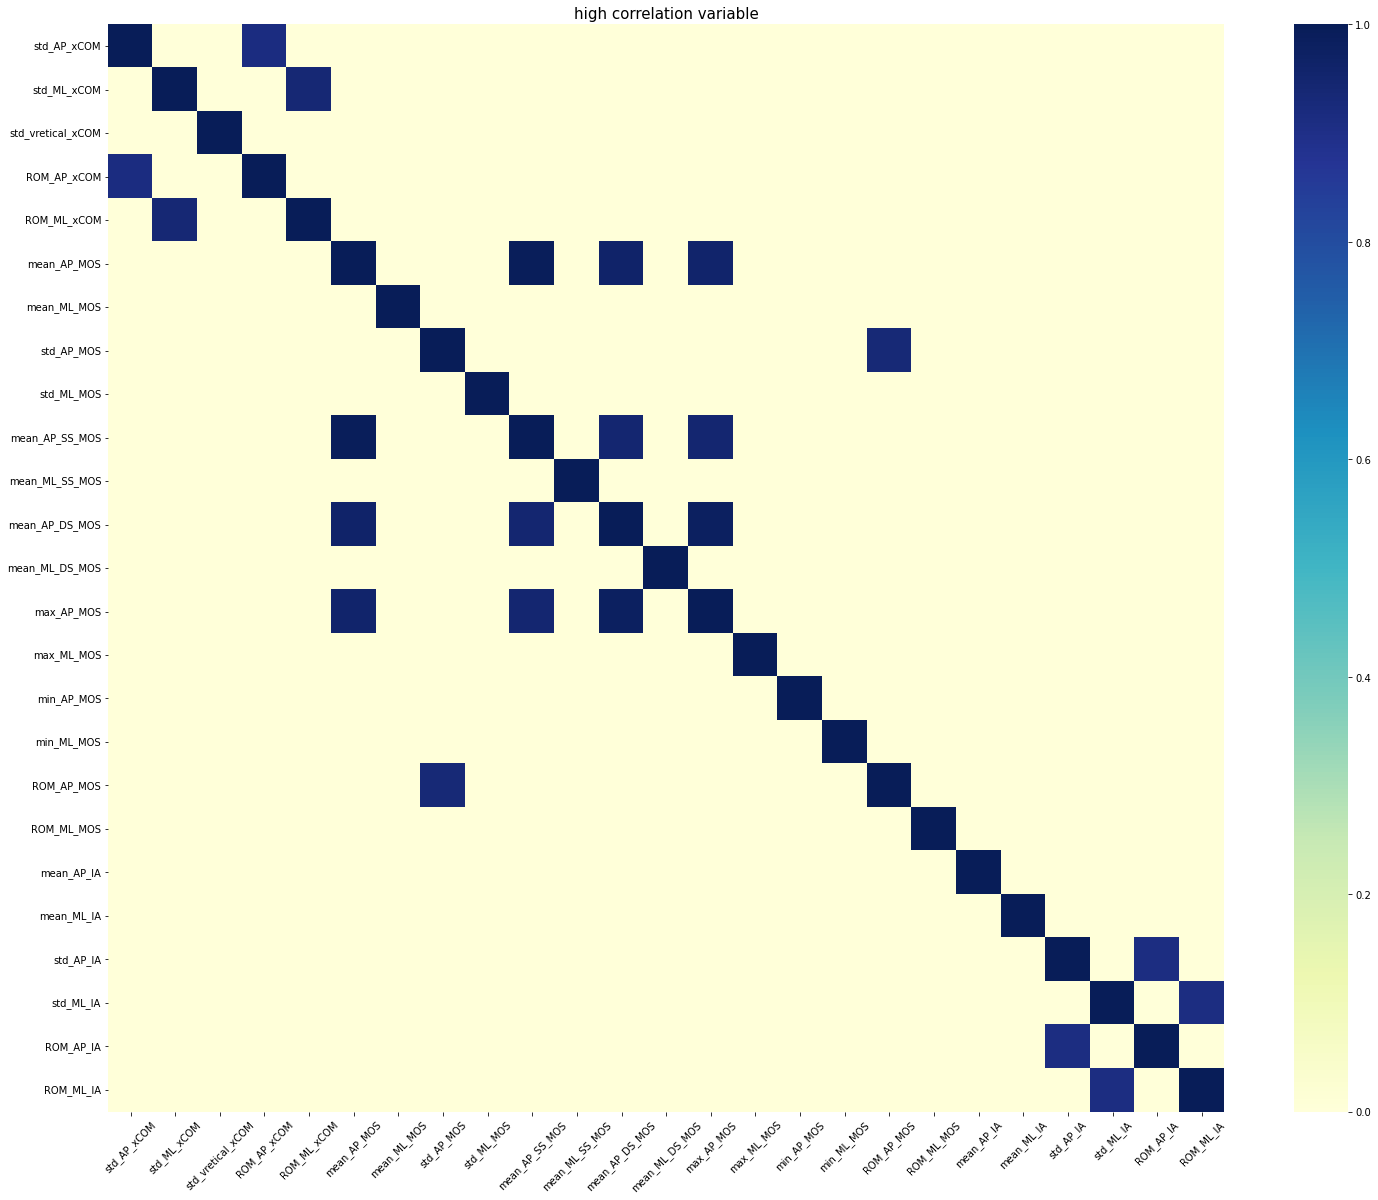

In [192]:
import seaborn as sns

fig = plt.figure(figsize = (25,20))
sns.heatmap(high_corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('high correlation variable', fontsize = 15)

In [193]:
all_clear_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'std_AP_xCOM', 'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA','target_performance']]

spatiotemporal_clear_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'target_performance'
       ]]

COP_clear_corr_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'target_performance'
       ]]

advanced_clear_corr_df = df_without_outlier[['std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'target_performance'
       ]]

Text(0.5, 1.0, 'high correlation variable')

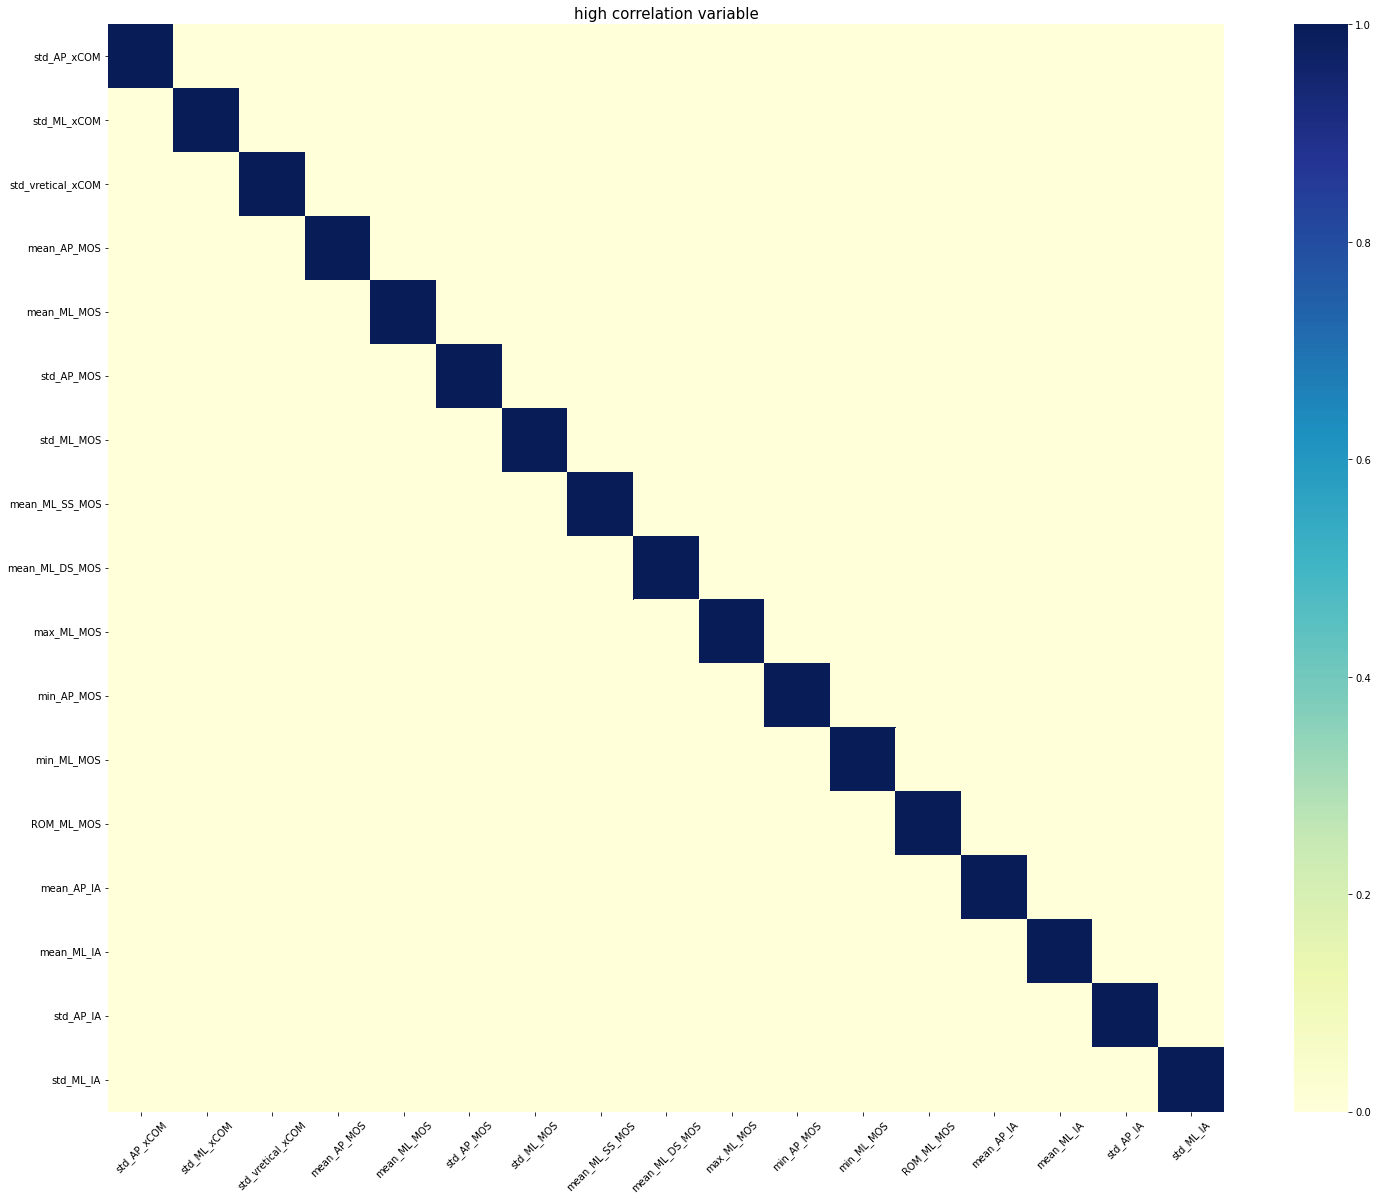

In [194]:
corr_df = advanced_clear_corr_df.corr()
high_corr_df = corr_df[corr_df > 0.9].fillna(0)
mid_corr_df_1 = corr_df[corr_df < 0.9]
mid_corr_df = mid_corr_df_1[corr_df > 0.5].fillna(0)
low_corr_df = corr_df[corr_df < 0.5].fillna(0)

fig = plt.figure(figsize = (25,20))
sns.heatmap(high_corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('high correlation variable', fontsize = 15)

C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<AxesSubplot:title={'center':'std_AP_COM'}>,
        <AxesSubplot:title={'center':'std_ML_COM'}>,
        <AxesSubplot:title={'center':'std_vretical_COM'}>,
        <AxesSubplot:title={'center':'std_AP_vCOM'}>],
       [<AxesSubplot:title={'center':'std_ML_vCOM'}>,
        <AxesSubplot:title={'center':'std_vretical_vCOM'}>,
        <AxesSubplot:title={'center':'max_AP_vCOM'}>,
        <AxesSubplot:title={'center':'max_ML_vCOM'}>],
       [<AxesSubplot:title={'center':'std_vretical_aCOM'}>,
        <AxesSubplot:title={'center':'max_ML_aCOM'}>,
        <AxesSubplot:title={'center':'max_AP_aCOM'}>,
        <AxesSubplot:title={'center':'SS_duration_ratio'}>],
       [<AxesSubplot:title={'center':'DS_duration_ratio'}>,
        <AxesSubplot:title={'center':'std_length'}>,
        <AxesSubplot:title={'center':'std_width'}>,
        <AxesSubplot:title={'center':'max_clearance'}>]], dtype=object)

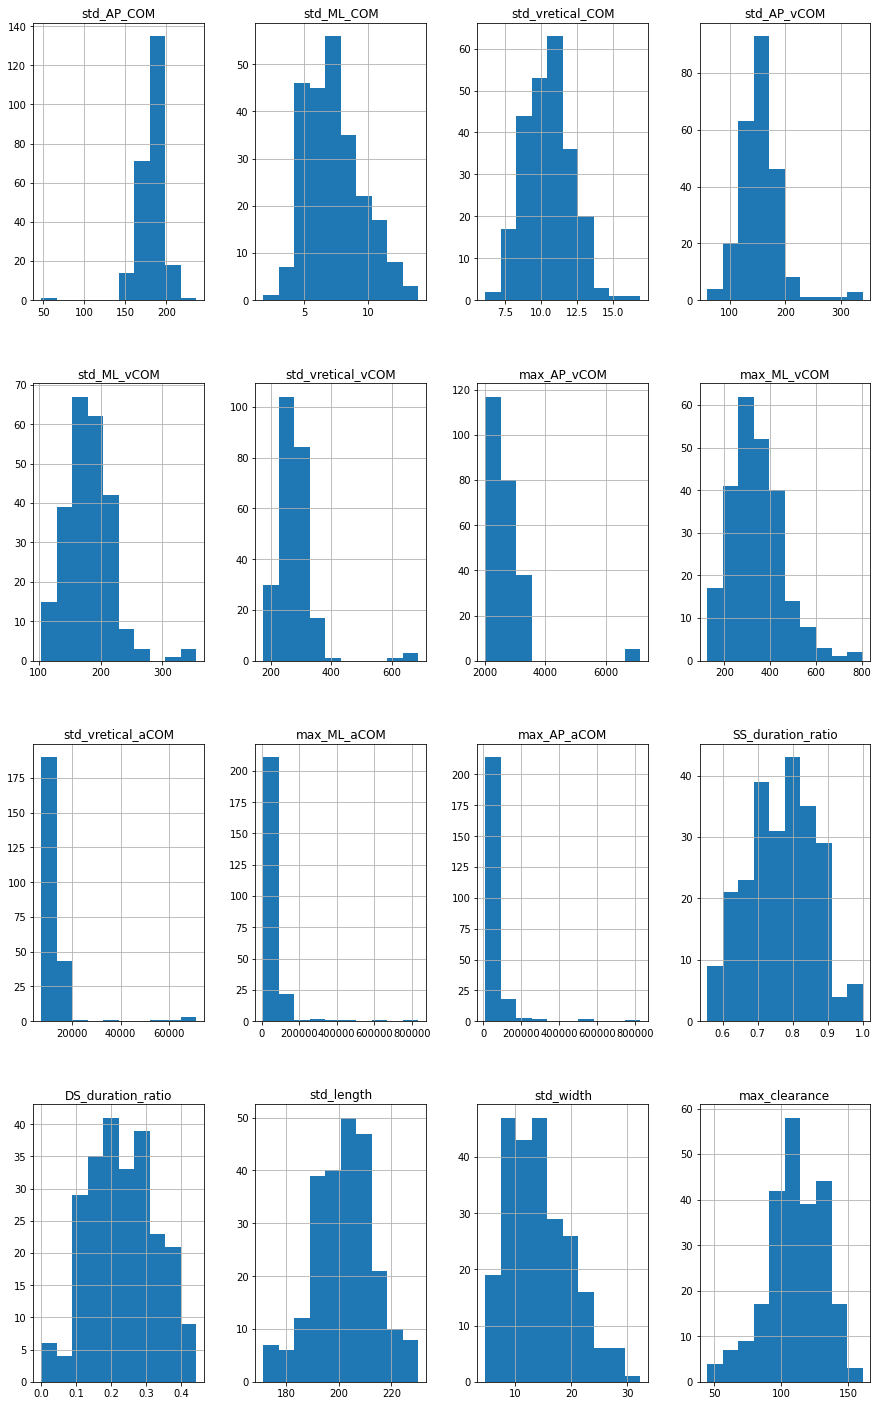

In [195]:
fig = plt.figure(figsize = (15,25))
ax = fig.gca()
spatiotemporal_clear_corr_df.hist(ax = ax)

In [196]:
spatiotemporal_clear_corr_df.groupby("target_performance").describe().SS_duration_ratio

,count,mean,std,min,25%,50%,75%,max
target_performance,,,,,,,,
Bad,60.0,0.795021,0.090203,0.64706,0.725618,0.777295,0.854908,1.00000
Good,75.0,0.756755,0.095380,0.57895,0.666670,0.769910,0.827255,0.97030
Moderate,105.0,0.758519,0.098414,0.55556,0.684210,0.771430,0.836360,0.94444


## Data processing

In [197]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [198]:
scaler = StandardScaler()
desired_dataset = all_clear_corr_df

In [199]:
input_df = desired_dataset.iloc[:,0:-1]
target_df = desired_dataset["target_performance"]

In [200]:
inputs = scaler.fit_transform(input_df)
targets = np.array(target_df)

In [201]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=42)

In [202]:
x_train.shape

(168, 41)

In [203]:
[uni_name, count] = np.unique(y_train, return_counts=True)
print("Training dataset: " + "\n" + uni_name[0] + " "  + str(count[0]) + "\n" + uni_name[1] + " "  + str(count[1]) + "\n" + uni_name[2] + " "  + str(count[2]) )

Training dataset: 
Bad 45
Good 53
Moderate 70


In [204]:
[uni_name, count] = np.unique(y_test, return_counts=True)
print("Testing dataset: " + "\n" + uni_name[0] + " "  + str(count[0]) + "\n" + uni_name[1] + " "  + str(count[1]) + "\n" + uni_name[2] + " "  + str(count[2]) )

Testing dataset: 
Bad 15
Good 22
Moderate 35


In [205]:
a = ['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'std_AP_xCOM', 'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA','target_performance']
spa_para = list(range(0, 16))
cop_para = list(range(16, 24))
advanced = list(range(24, 41))


In [206]:
all_input_df = input_df
spa_input_df = input_df.iloc[:,0:16]
cop_input_df = input_df.iloc[:,16:24]
adv_input_df = input_df.iloc[:,24:]

all_x_train = x_train
spa_x_train = x_train[:,0:16]
cop_x_train = x_train[:,16:24]
adv_x_train = x_train[:,24:]

all_x_test = x_test
spa_x_test = x_test[:,0:16]
cop_x_test = x_test[:,16:24]
adv_x_test = x_test[:,24:]

## Model training

In [207]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

SVC_reg = SVC()
DT_reg = DecisionTreeClassifier()
Log_reg = LogisticRegression()
RF_reg = RandomForestClassifier()

In [208]:
from sklearn.model_selection import GridSearchCV

SVC_para = {
    "C":[1,1.2,2,2.5,3],
    "kernel":['linear', 'poly', 'rbf', 'sigmoid'],
    "degree":[2,3,4,5],
    "probability":[True]
}

DT_para = {
    "criterion": ["gini", "entropy"],
    'max_depth': [1,2,3,4,5], 
    'max_leaf_nodes': [8,9,10,15]
}

Log_para = {
    "penalty": ['l2', 'none'],
    "C":[1,1.2,2,2.5,3],
    "max_iter":[200, 300, 400],
    "solver":['lbfgs']
}

RF_para = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [1,2,3], 
    'max_leaf_nodes': [8,9,10,15], 
    'n_estimators': [ 100, 200, 300]
}


### All features

In [209]:
all_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
all_SVC_grid_search.fit(all_x_train, y_train.ravel())
all_SVC_grid_search.best_params_

{'C': 1.2, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [210]:
all_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
all_DT_grid_search.fit(all_x_train, y_train)
all_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 15}

In [211]:
all_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
all_RF_grid_search.fit(all_x_train, y_train)
all_RF_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 10,
 'n_estimators': 300}

In [212]:
all_SVC_best_reg = all_SVC_grid_search.best_estimator_
all_DT_best_reg = all_DT_grid_search.best_estimator_
all_RF_best_reg = all_RF_grid_search.best_estimator_

In [213]:
all_SVC_best_reg.score(all_x_test, y_test.ravel())

0.8333333333333334

In [214]:
all_DT_best_reg.score(all_x_test, y_test.ravel())

0.8888888888888888

In [215]:
all_RF_best_reg.score(all_x_test, y_test.ravel())

0.8333333333333334

[Text(438.4285714285714, 996.6, 'std_vretical_xCOM <= -0.685\nentropy = 1.56\nsamples = 168\nvalue = [45, 53, 70]\nclass = Bad'),
 Text(159.42857142857142, 815.4000000000001, 'max_clearance <= 0.025\nentropy = 0.847\nsamples = 62\nvalue = [45, 17, 0]\nclass = Good'),
 Text(79.71428571428571, 634.2, 'entropy = 0.0\nsamples = 26\nvalue = [26, 0, 0]\nclass = Good'),
 Text(239.1428571428571, 634.2, 'std_ML_IA <= 1.032\nentropy = 0.998\nsamples = 36\nvalue = [19, 17, 0]\nclass = Good'),
 Text(159.42857142857142, 453.0, 'min_ML_MOS <= -0.531\nentropy = 0.871\nsamples = 24\nvalue = [7, 17, 0]\nclass = Moderate'),
 Text(79.71428571428571, 271.79999999999995, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0, 0]\nclass = Good'),
 Text(239.1428571428571, 271.79999999999995, 'std_ML_MOS <= -0.893\nentropy = 0.61\nsamples = 20\nvalue = [3, 17, 0]\nclass = Moderate'),
 Text(159.42857142857142, 90.59999999999991, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = Good'),
 Text(318.85714285714283, 90.5

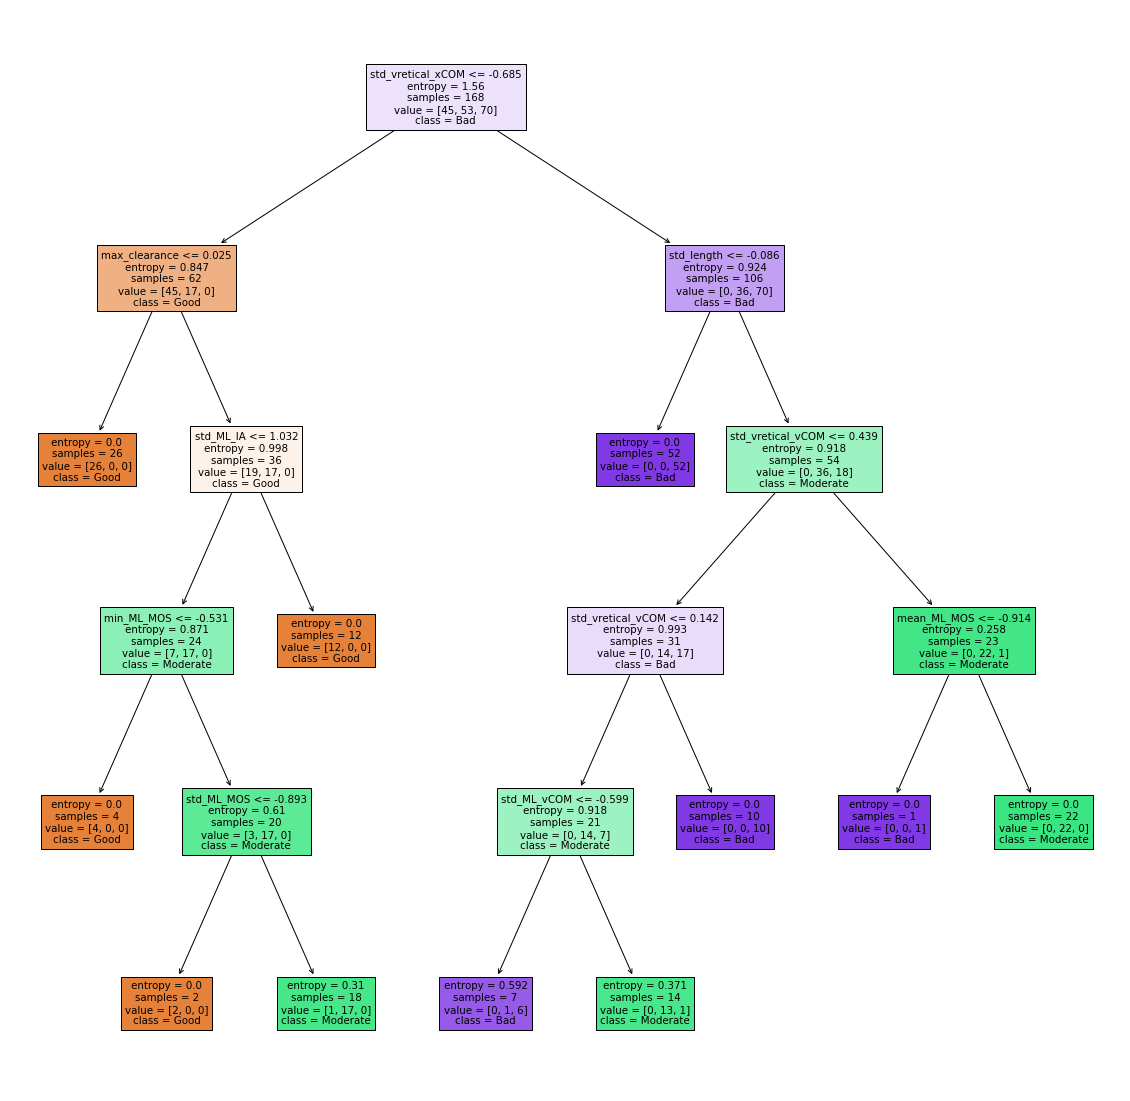

In [216]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(all_DT_best_reg, 
              feature_names=list(all_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'std_AP_xCOM <= 0.128\ngini = 0.636\nsamples = 107\nvalue = [46, 42, 80]\nclass = Bad'),
 Text(279.0, 679.5, 'std_vretical_xCOM <= -0.629\ngini = 0.457\nsamples = 57\nvalue = [17, 8, 59]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'std_ML_COP <= -1.708\ngini = 0.105\nsamples = 12\nvalue = [17, 1, 0]\nclass = Good'),
 Text(69.75, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Moderate'),
 Text(209.25, 135.89999999999998, 'gini = 0.0\nsamples = 11\nvalue = [17, 0, 0]\nclass = Good'),
 Text(418.5, 407.70000000000005, 'std_length <= 0.429\ngini = 0.19\nsamples = 45\nvalue = [0, 7, 59]\nclass = Bad'),
 Text(348.75, 135.89999999999998, 'gini = 0.094\nsamples = 40\nvalue = [0, 3, 58]\nclass = Bad'),
 Text(488.25, 135.89999999999998, 'gini = 0.32\nsamples = 5\nvalue = [0, 4, 1]\nclass = Moderate'),
 Text(837.0, 679.5, 'std_ML_aCOP <= -0.374\ngini = 0.654\nsamples = 50\nvalue = [29, 34, 21]\nclass = Moderate'),
 Text(697.5, 407.7000

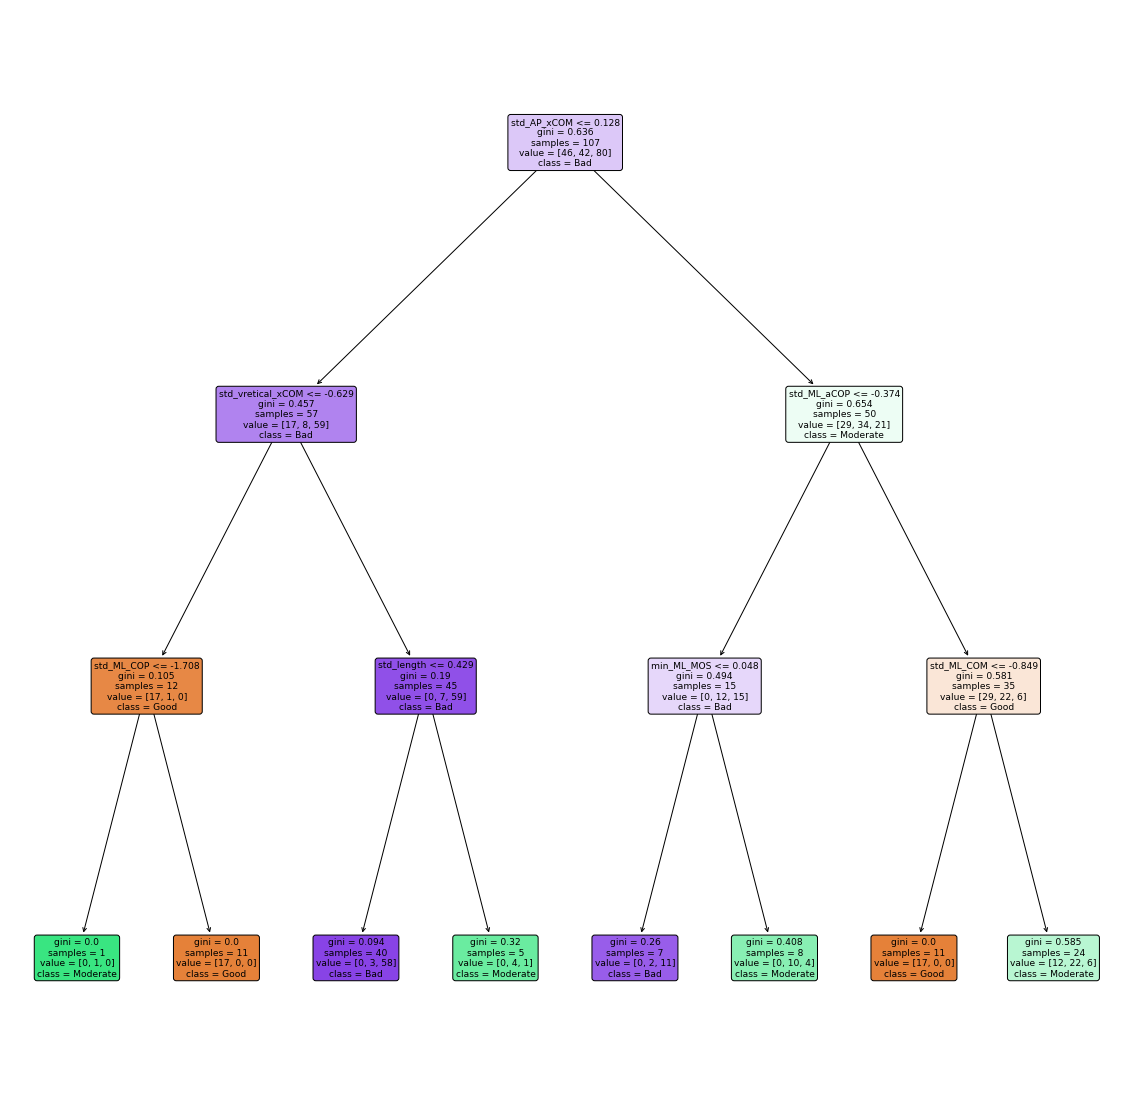

In [217]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(all_RF_best_reg.estimators_[0], 
              feature_names=list(all_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [218]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [219]:
acc_3_t = accuracy_score(y_test.ravel(), all_SVC_best_reg.predict(all_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), all_SVC_best_reg.predict(all_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("all SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

all SVC
acc: 0.833
recall: 0.81
precision: 0.816


Text(0.5, 1.0, 'SVC confusion matrix')

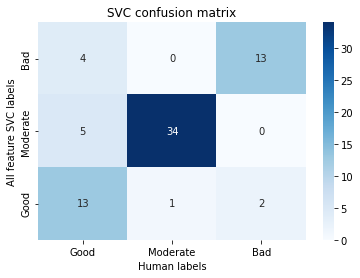

In [220]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), all_SVC_best_reg.predict(all_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), all_SVC_best_reg.predict(all_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('All feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [221]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("All feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

All feature SVC Sensitivity: 
 Good prediction: 59.09090909090909 
 Moderate prediction 97.14285714285714 
 Bad prediction 86.66666666666667


In [222]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("All feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


All feature SVC Precision: 
 Good prediction: 81.25 
 Moderate prediction 87.17948717948718 
 Bad prediction 76.47058823529412


In [223]:
acc_3_t = accuracy_score(y_test.ravel(), all_DT_best_reg.predict(all_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), all_DT_best_reg.predict(all_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("all DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

all DT
acc: 0.889
recall: 0.863
precision: 0.873


Text(0.5, 1.0, 'DT confusion matrix')

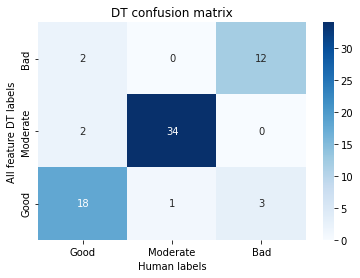

In [224]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), all_DT_best_reg.predict(all_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), all_DT_best_reg.predict(all_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('All feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [225]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("All feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

All feature DT Sensitivity: 
 Good prediction: 81.81818181818183 
 Moderate prediction 97.14285714285714 
 Bad prediction 80.0


In [226]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("All feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


All feature DT Precision: 
 Good prediction: 81.81818181818183 
 Moderate prediction 94.44444444444444 
 Bad prediction 85.71428571428571


In [227]:
acc_3_t = accuracy_score(y_test.ravel(), all_RF_best_reg.predict(all_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), all_RF_best_reg.predict(all_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("all RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

all RF
acc: 0.833
recall: 0.818
precision: 0.85


Text(0.5, 1.0, 'RF confusion matrix')

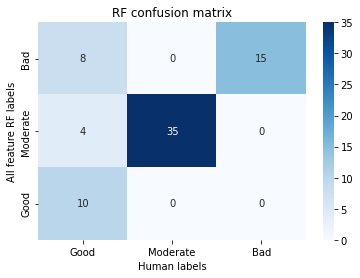

In [228]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), all_RF_best_reg.predict(all_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), all_RF_best_reg.predict(all_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('All feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [229]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("All feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

All feature RF Sensitivity: 
 Good prediction: 45.45454545454545 
 Moderate prediction 100.0 
 Bad prediction 100.0


In [230]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("All feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


All feature RF Precision: 
 Good prediction: 100.0 
 Moderate prediction 89.74358974358975 
 Bad prediction 65.21739130434783


### spatiotemporal features

In [231]:
spa_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
spa_SVC_grid_search.fit(spa_x_train, y_train.ravel())
spa_SVC_grid_search.best_params_

{'C': 2.5, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [232]:
spa_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
spa_DT_grid_search.fit(spa_x_train, y_train)
spa_DT_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 9}

In [233]:
spa_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
spa_RF_grid_search.fit(spa_x_train, y_train)
spa_RF_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 10,
 'n_estimators': 300}

In [234]:
spa_SVC_best_reg = spa_SVC_grid_search.best_estimator_
spa_DT_best_reg =spa_DT_grid_search.best_estimator_
spa_RF_best_reg = spa_RF_grid_search.best_estimator_

In [235]:
spa_SVC_best_reg.score(spa_x_test, y_test.ravel())

0.7777777777777778

In [236]:
spa_DT_best_reg.score(spa_x_test, y_test.ravel())

0.7916666666666666

In [237]:
spa_RF_best_reg.score(spa_x_test, y_test.ravel())

0.8055555555555556

[Text(472.15384615384613, 978.48, 'max_AP_aCOM <= -0.219\ngini = 0.655\nsamples = 168\nvalue = [45, 53, 70]\nclass = Bad'),
 Text(171.69230769230768, 761.0400000000001, 'std_length <= -0.086\ngini = 0.395\nsamples = 85\nvalue = [2, 20, 63]\nclass = Bad'),
 Text(85.84615384615384, 543.6, 'gini = 0.0\nsamples = 45\nvalue = [0, 0, 45]\nclass = Bad'),
 Text(257.53846153846155, 543.6, 'std_AP_vCOM <= 0.468\ngini = 0.545\nsamples = 40\nvalue = [2, 20, 18]\nclass = Moderate'),
 Text(171.69230769230768, 326.1600000000001, 'std_vretical_vCOM <= 0.504\ngini = 0.533\nsamples = 29\nvalue = [2, 10, 17]\nclass = Bad'),
 Text(85.84615384615384, 108.72000000000003, 'gini = 0.43\nsamples = 22\nvalue = [2, 4, 16]\nclass = Bad'),
 Text(257.53846153846155, 108.72000000000003, 'gini = 0.245\nsamples = 7\nvalue = [0, 6, 1]\nclass = Moderate'),
 Text(343.38461538461536, 326.1600000000001, 'gini = 0.165\nsamples = 11\nvalue = [0, 10, 1]\nclass = Moderate'),
 Text(772.6153846153845, 761.0400000000001, 'std_len

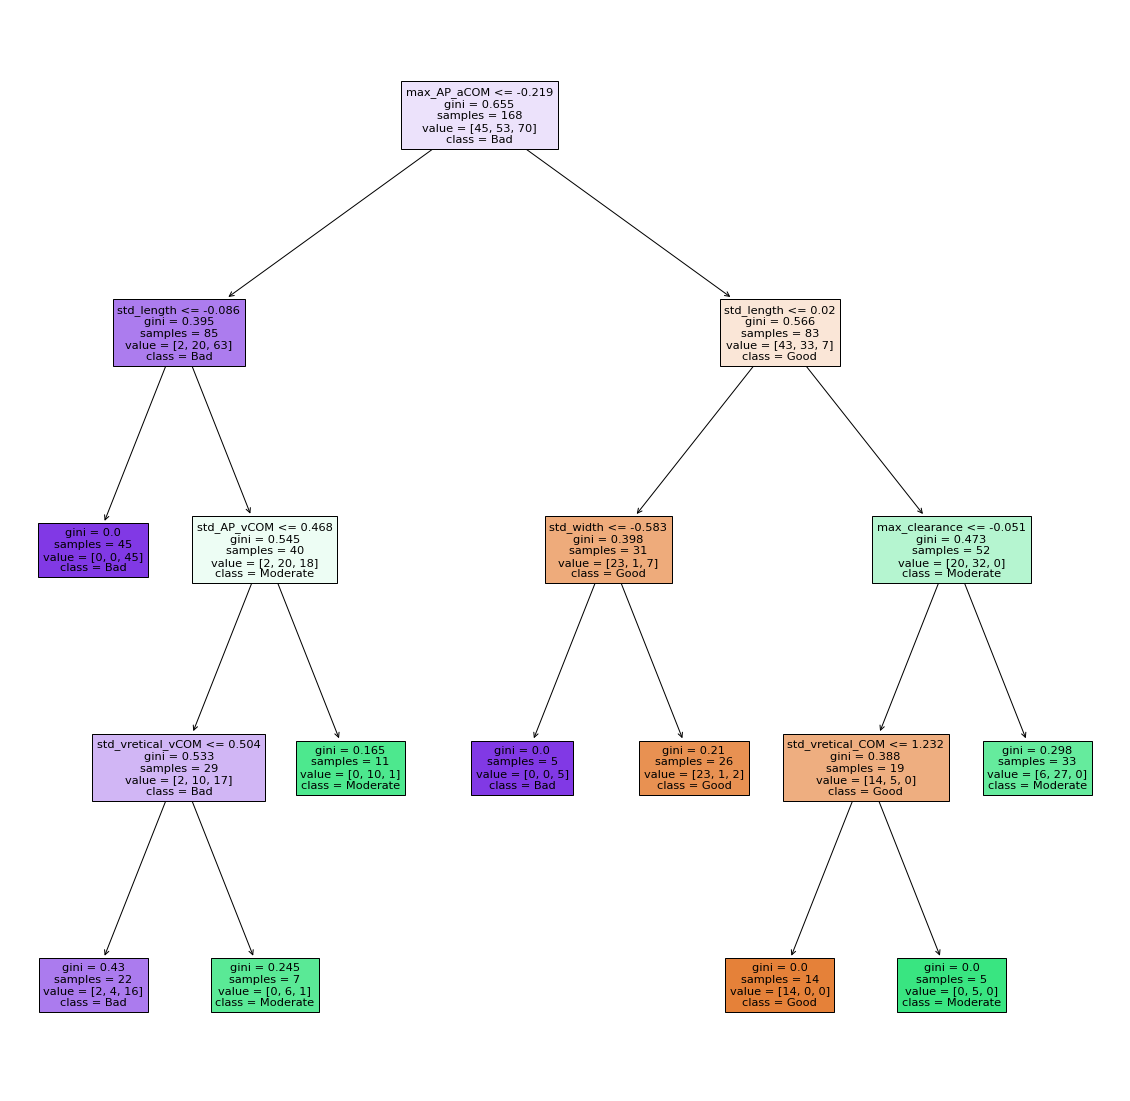

In [238]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_DT_best_reg, 
              feature_names=list(spa_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(604.5, 951.3000000000001, 'max_ML_aCOM <= -0.296\nentropy = 1.529\nsamples = 109\nvalue = [36, 59, 73]\nclass = Bad'),
 Text(372.0, 679.5, 'std_length <= 0.129\nentropy = 0.971\nsamples = 53\nvalue = [1, 25, 57]\nclass = Bad'),
 Text(186.0, 407.70000000000005, 'std_vretical_COM <= 0.778\nentropy = 0.377\nsamples = 32\nvalue = [1, 2, 48]\nclass = Bad'),
 Text(93.0, 135.89999999999998, 'entropy = 0.144\nsamples = 30\nvalue = [1, 0, 48]\nclass = Bad'),
 Text(279.0, 135.89999999999998, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = Moderate'),
 Text(558.0, 407.70000000000005, 'max_clearance <= -0.172\nentropy = 0.857\nsamples = 21\nvalue = [0, 23, 9]\nclass = Moderate'),
 Text(465.0, 135.89999999999998, 'entropy = 0.592\nsamples = 5\nvalue = [0, 1, 6]\nclass = Bad'),
 Text(651.0, 135.89999999999998, 'entropy = 0.529\nsamples = 16\nvalue = [0, 22, 3]\nclass = Moderate'),
 Text(837.0, 679.5, 'SS_duration_ratio <= -0.912\nentropy = 1.509\nsamples = 56\nvalue = [35, 34, 16]\ncla

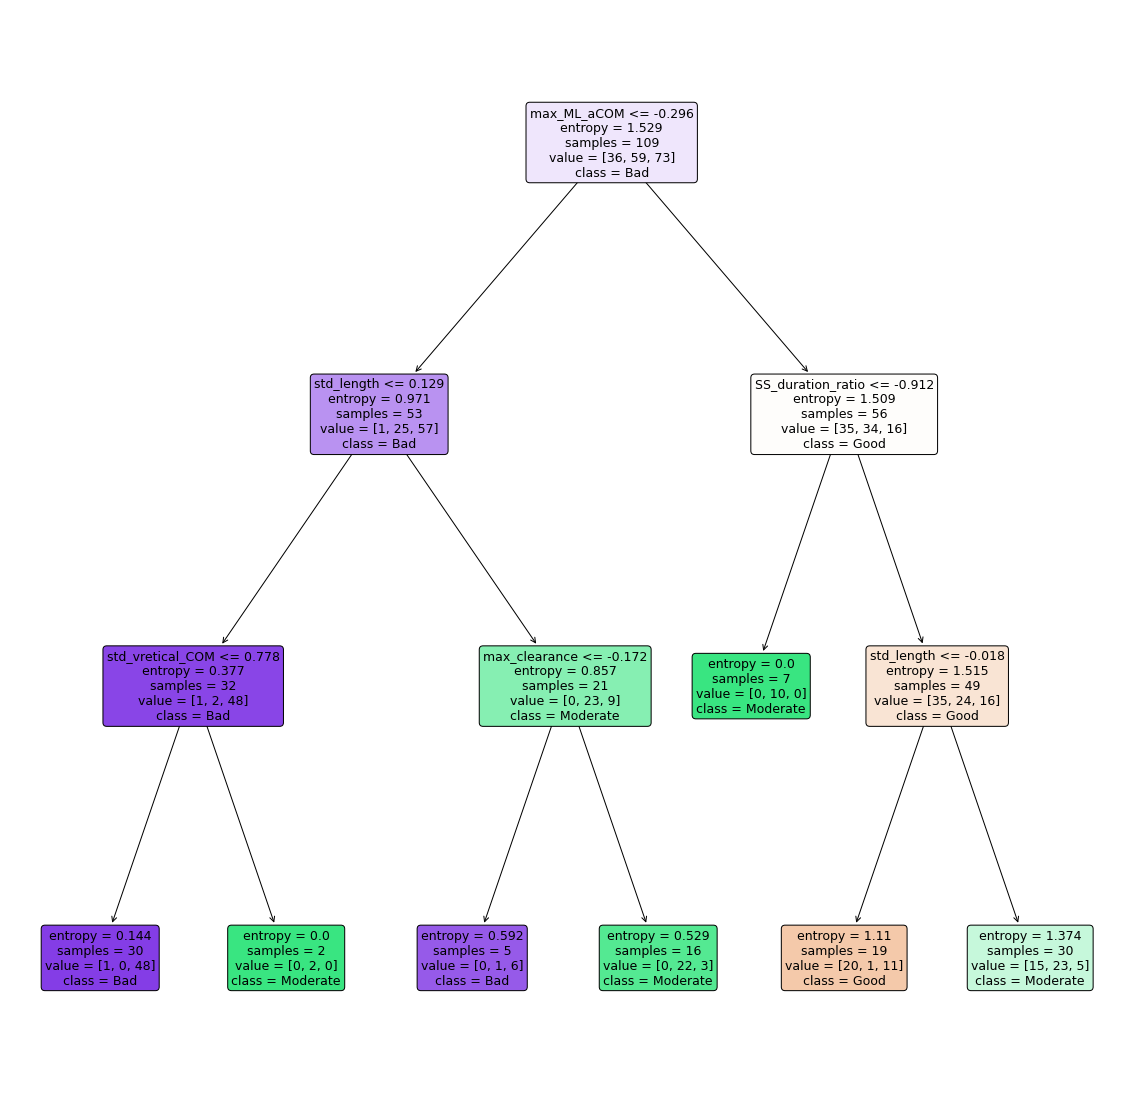

In [239]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_RF_best_reg.estimators_[0], 
              feature_names=list(spa_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [240]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [241]:
acc_3_t = accuracy_score(y_test.ravel(), spa_SVC_best_reg.predict(spa_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_SVC_best_reg.predict(spa_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spatiotemporal SVC" + "\n" + "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spatiotemporal SVC
acc: 0.778
recall: 0.707
precision: 0.734


Text(0.5, 1.0, 'SVC confusion matrix')

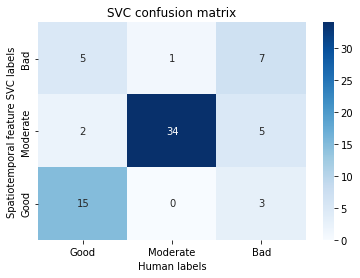

In [242]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_SVC_best_reg.predict(spa_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_SVC_best_reg.predict(spa_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Spatiotemporal feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [243]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Spatiotemporal feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Spatiotemporal feature SVC Sensitivity: 
 Good prediction: 68.18181818181817 
 Moderate prediction 97.14285714285714 
 Bad prediction 46.666666666666664


In [244]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Spatiotemporal feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Spatiotemporal feature SVC Precision: 
 Good prediction: 83.33333333333334 
 Moderate prediction 82.92682926829268 
 Bad prediction 53.84615384615385


In [245]:
acc_3_t = accuracy_score(y_test.ravel(), spa_DT_best_reg.predict(spa_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_DT_best_reg.predict(spa_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spatiotemporal DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spatiotemporal DT
acc: 0.792
recall: 0.733
precision: 0.762


Text(0.5, 1.0, 'DT confusion matrix')

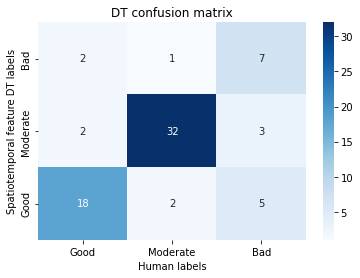

In [246]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_DT_best_reg.predict(spa_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_DT_best_reg.predict(spa_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Spatiotemporal feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [247]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Spatiotemporal feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Spatiotemporal feature DT Sensitivity: 
 Good prediction: 81.81818181818183 
 Moderate prediction 91.42857142857143 
 Bad prediction 46.666666666666664


In [248]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Spatiotemporal feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Spatiotemporal feature DT Precision: 
 Good prediction: 72.0 
 Moderate prediction 86.48648648648648 
 Bad prediction 70.0


In [249]:
acc_3_t = accuracy_score(y_test.ravel(), spa_RF_best_reg.predict(spa_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_RF_best_reg.predict(spa_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spatiotemporal RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spatiotemporal RF
acc: 0.806
recall: 0.757
precision: 0.808


Text(0.5, 1.0, 'RF confusion matrix')

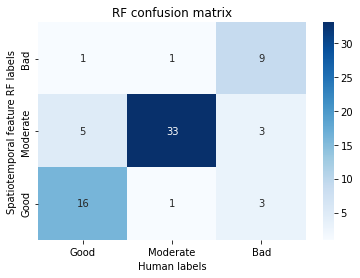

In [250]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_RF_best_reg.predict(spa_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_RF_best_reg.predict(spa_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Spatiotemporal feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [251]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Spatiotemporal feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Spatiotemporal feature RF Sensitivity: 
 Good prediction: 72.72727272727273 
 Moderate prediction 94.28571428571428 
 Bad prediction 60.0


In [252]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Spatiotemporal feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Spatiotemporal feature RF Precision: 
 Good prediction: 80.0 
 Moderate prediction 80.48780487804879 
 Bad prediction 81.81818181818183


### cop features

In [253]:
COP_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
COP_SVC_grid_search.fit(cop_x_train, y_train.ravel())
COP_SVC_grid_search.best_params_

{'C': 1, 'degree': 2, 'kernel': 'linear', 'probability': True}

In [254]:
COP_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
COP_DT_grid_search.fit(cop_x_train, y_train)
COP_DT_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 8}

In [255]:
COP_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
COP_RF_grid_search.fit(cop_x_train, y_train)
COP_RF_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 10,
 'n_estimators': 300}

In [256]:
COP_SVC_best_reg = COP_SVC_grid_search.best_estimator_
COP_DT_best_reg = COP_DT_grid_search.best_estimator_
COP_RF_best_reg = COP_RF_grid_search.best_estimator_

In [257]:
COP_SVC_best_reg.score(cop_x_test, y_test.ravel())

0.6111111111111112

In [258]:
COP_DT_best_reg.score(cop_x_test, y_test.ravel())

0.6111111111111112

In [259]:
COP_RF_best_reg.score(cop_x_test, y_test.ravel())

0.6666666666666666

[Text(608.7272727272727, 978.48, 'std_AP_aCOP <= -0.185\ngini = 0.655\nsamples = 168\nvalue = [45, 53, 70]\nclass = Bad'),
 Text(405.8181818181818, 761.0400000000001, 'std_AP_COP <= -1.033\ngini = 0.519\nsamples = 93\nvalue = [8, 27, 58]\nclass = Bad'),
 Text(304.3636363636364, 543.6, 'std_ML_COP <= -0.529\ngini = 0.586\nsamples = 16\nvalue = [4, 9, 3]\nclass = Moderate'),
 Text(202.9090909090909, 326.1600000000001, 'std_ML_COP <= -1.738\ngini = 0.5\nsamples = 14\nvalue = [4, 9, 1]\nclass = Moderate'),
 Text(101.45454545454545, 108.72000000000003, 'gini = 0.571\nsamples = 7\nvalue = [4, 2, 1]\nclass = Good'),
 Text(304.3636363636364, 108.72000000000003, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0]\nclass = Moderate'),
 Text(405.8181818181818, 326.1600000000001, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = Bad'),
 Text(507.27272727272725, 543.6, 'gini = 0.432\nsamples = 77\nvalue = [4, 18, 55]\nclass = Bad'),
 Text(811.6363636363636, 761.0400000000001, 'std_AP_vCOP <= -0.158\ngin

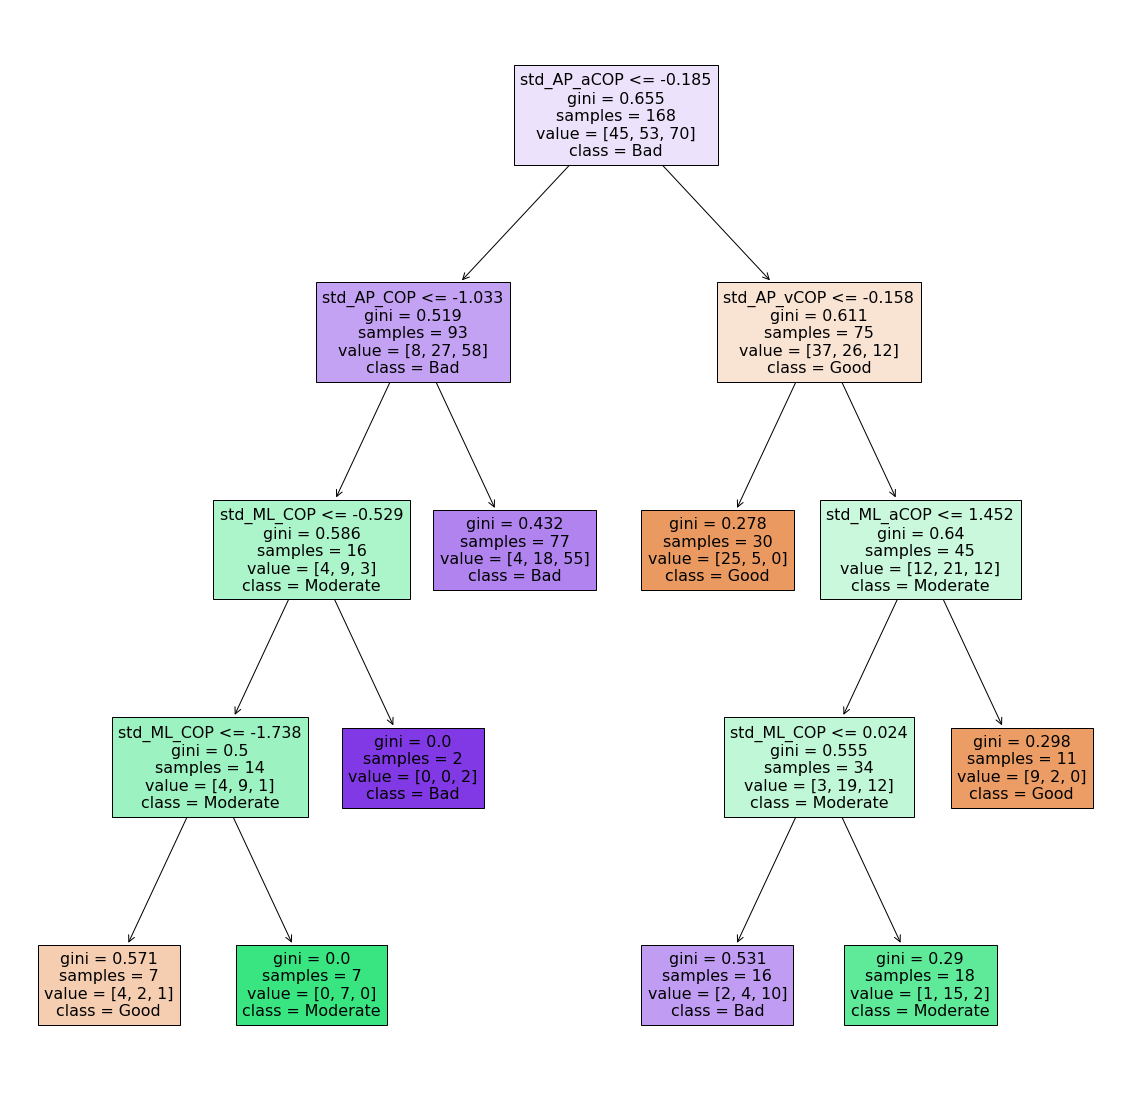

In [260]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(COP_DT_best_reg, 
              feature_names=list(cop_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'std_ML_COP <= 1.109\nentropy = 1.524\nsamples = 104\nvalue = [35, 60, 73]\nclass = Bad'),
 Text(279.0, 679.5, 'max_ML_vCOP <= 0.742\nentropy = 1.461\nsamples = 90\nvalue = [23, 57, 69]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'std_ML_aCOP <= -0.381\nentropy = 1.473\nsamples = 81\nvalue = [23, 47, 65]\nclass = Bad'),
 Text(69.75, 135.89999999999998, 'entropy = 1.199\nsamples = 50\nvalue = [6, 25, 55]\nclass = Bad'),
 Text(209.25, 135.89999999999998, 'entropy = 1.516\nsamples = 31\nvalue = [17, 22, 10]\nclass = Moderate'),
 Text(418.5, 407.70000000000005, 'max_AP_vCOP <= 4.727\nentropy = 0.863\nsamples = 9\nvalue = [0, 10, 4]\nclass = Moderate'),
 Text(348.75, 135.89999999999998, 'entropy = 0.779\nsamples = 8\nvalue = [0, 10, 3]\nclass = Moderate'),
 Text(488.25, 135.89999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Bad'),
 Text(837.0, 679.5, 'std_ML_vCOP <= 1.443\nentropy = 1.312\nsamples = 14\nvalue = [12, 3, 4]\nclass = Go

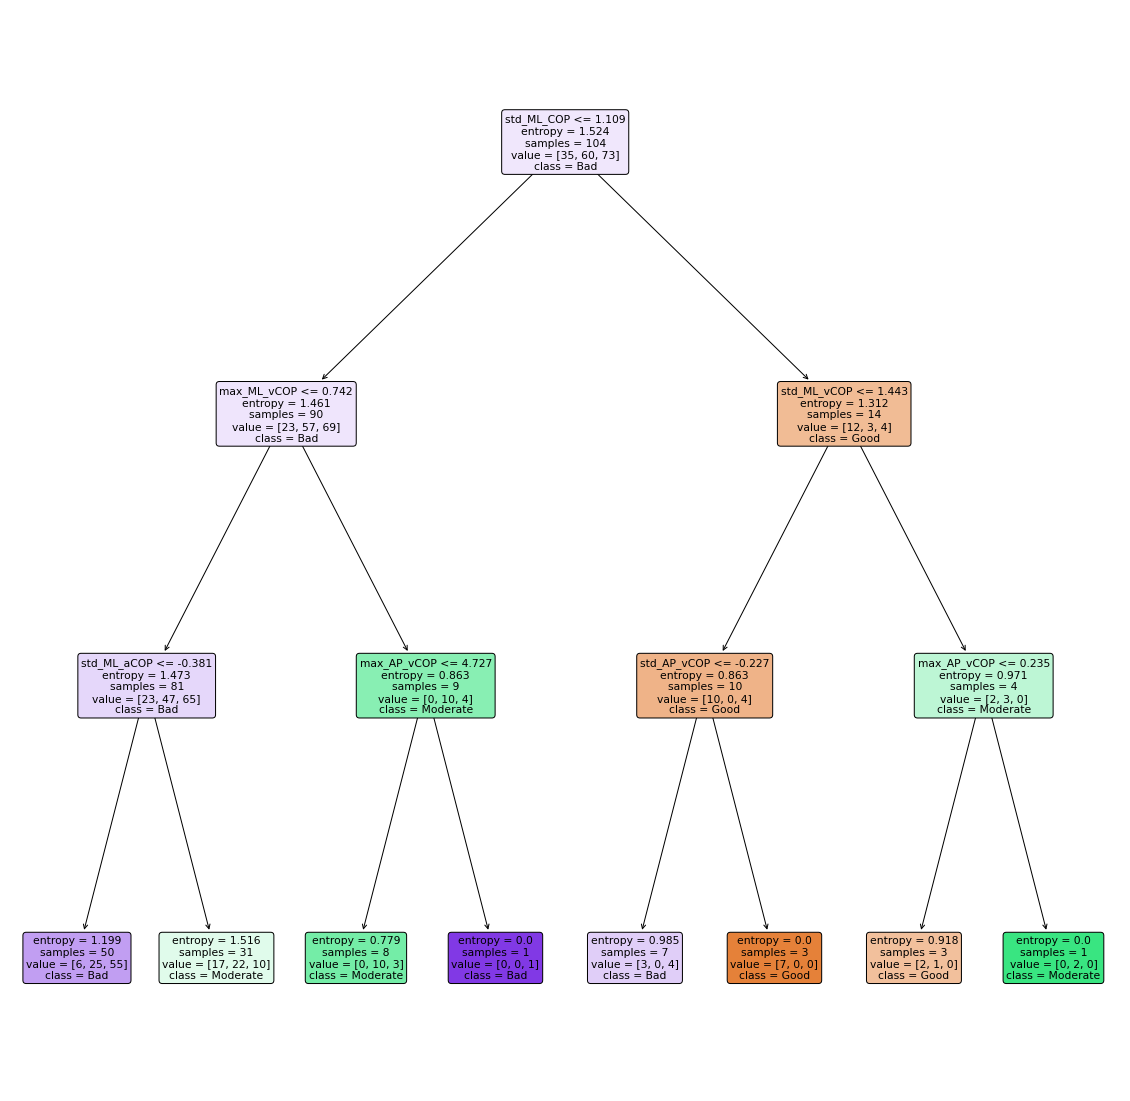

In [261]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(COP_RF_best_reg.estimators_[0], 
              feature_names=list(cop_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [262]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [263]:
acc_3_t = accuracy_score(y_test.ravel(), COP_SVC_best_reg.predict(cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), COP_SVC_best_reg.predict(cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("forceplates SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

forceplates SVC
acc: 0.611
recall: 0.523
precision: 0.535


Text(0.5, 1.0, 'SVC confusion matrix')

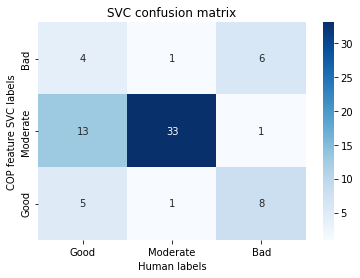

In [264]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), COP_SVC_best_reg.predict(cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), COP_SVC_best_reg.predict(cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('COP feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [265]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("COP feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

COP feature SVC Sensitivity: 
 Good prediction: 22.727272727272727 
 Moderate prediction 94.28571428571428 
 Bad prediction 40.0


In [266]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("COP feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


COP feature SVC Precision: 
 Good prediction: 35.714285714285715 
 Moderate prediction 70.2127659574468 
 Bad prediction 54.54545454545454


In [267]:
acc_3_t = accuracy_score(y_test.ravel(), COP_DT_best_reg.predict(cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), COP_DT_best_reg.predict(cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("forceplates DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

forceplates DT
acc: 0.611
recall: 0.573
precision: 0.565


Text(0.5, 1.0, 'DT confusion matrix')

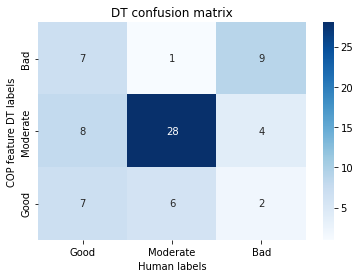

In [268]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), COP_DT_best_reg.predict(cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), COP_DT_best_reg.predict(cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('COP feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [269]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("COP feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

COP feature DT Sensitivity: 
 Good prediction: 31.818181818181817 
 Moderate prediction 80.0 
 Bad prediction 60.0


In [270]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("COP feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


COP feature DT Precision: 
 Good prediction: 46.666666666666664 
 Moderate prediction 70.0 
 Bad prediction 52.94117647058824


In [271]:
acc_3_t = accuracy_score(y_test.ravel(), COP_RF_best_reg.predict(cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), COP_RF_best_reg.predict(cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("forceplates RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

forceplates RF
acc: 0.667
recall: 0.642
precision: 0.64


Text(0.5, 1.0, 'RF confusion matrix')

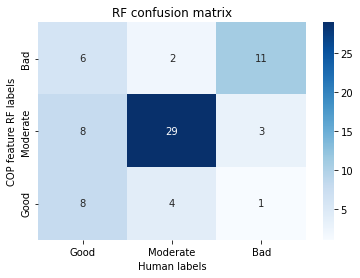

In [272]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), COP_RF_best_reg.predict(cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), COP_RF_best_reg.predict(cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('COP feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [273]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("COP feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

COP feature RF Sensitivity: 
 Good prediction: 36.36363636363637 
 Moderate prediction 82.85714285714286 
 Bad prediction 73.33333333333333


In [274]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("COP feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


COP feature RF Precision: 
 Good prediction: 61.53846153846154 
 Moderate prediction 72.5 
 Bad prediction 57.89473684210527


### advanced features

In [275]:
adv_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
adv_SVC_grid_search.fit(adv_x_train, y_train.ravel())
adv_SVC_grid_search.best_params_

{'C': 2, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [276]:
adv_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
adv_DT_grid_search.fit(adv_x_train, y_train)
adv_DT_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 10}

In [277]:
adv_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
adv_RF_grid_search.fit(adv_x_train, y_train)
adv_RF_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 9, 'n_estimators': 200}

In [278]:
adv_SVC_best_reg = adv_SVC_grid_search.best_estimator_
adv_DT_best_reg = adv_DT_grid_search.best_estimator_
adv_RF_best_reg = adv_RF_grid_search.best_estimator_

In [279]:
adv_SVC_best_reg.score(adv_x_test, y_test.ravel())

0.75

In [280]:
adv_DT_best_reg.score(adv_x_test, y_test.ravel())

0.625

In [281]:
adv_RF_best_reg.score(adv_x_test, y_test.ravel())

0.7361111111111112

[Text(558.0, 996.6, 'std_vretical_xCOM <= -0.685\ngini = 0.655\nsamples = 168\nvalue = [45, 53, 70]\nclass = Bad'),
 Text(343.38461538461536, 815.4000000000001, 'std_AP_xCOM <= 0.616\ngini = 0.398\nsamples = 62\nvalue = [45, 17, 0]\nclass = Good'),
 Text(171.69230769230768, 634.2, 'std_AP_IA <= -2.965\ngini = 0.202\nsamples = 35\nvalue = [31, 4, 0]\nclass = Good'),
 Text(85.84615384615384, 453.0, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = Moderate'),
 Text(257.53846153846155, 453.0, 'gini = 0.061\nsamples = 32\nvalue = [31, 1, 0]\nclass = Good'),
 Text(515.0769230769231, 634.2, 'mean_ML_SS_MOS <= -0.339\ngini = 0.499\nsamples = 27\nvalue = [14, 13, 0]\nclass = Good'),
 Text(429.23076923076917, 453.0, 'mean_ML_DS_MOS <= 1.526\ngini = 0.444\nsamples = 21\nvalue = [14, 7, 0]\nclass = Good'),
 Text(343.38461538461536, 271.79999999999995, 'std_AP_xCOM <= 0.699\ngini = 0.291\nsamples = 17\nvalue = [14, 3, 0]\nclass = Good'),
 Text(257.53846153846155, 90.59999999999991, 'gini = 0.0\

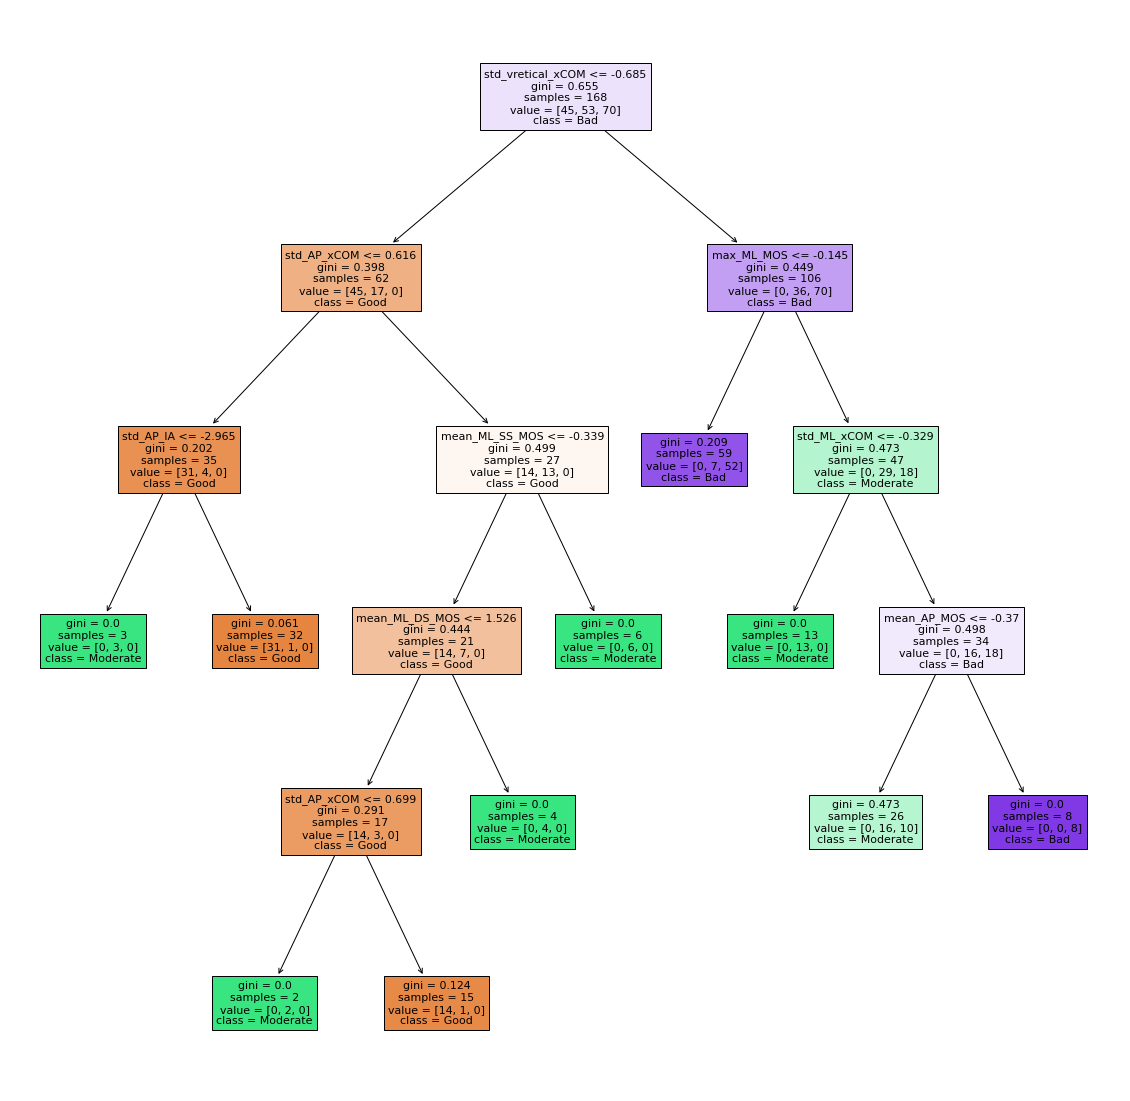

In [282]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(adv_DT_best_reg, 
              feature_names=list(adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(511.5, 951.3000000000001, 'std_ML_xCOM <= -0.46\ngini = 0.647\nsamples = 102\nvalue = [44, 49, 75]\nclass = Bad'),
 Text(279.0, 679.5, 'mean_ML_SS_MOS <= 0.678\ngini = 0.444\nsamples = 43\nvalue = [42, 21, 0]\nclass = Good'),
 Text(186.0, 407.70000000000005, 'std_AP_xCOM <= 1.126\ngini = 0.375\nsamples = 38\nvalue = [42, 14, 0]\nclass = Good'),
 Text(93.0, 135.89999999999998, 'gini = 0.201\nsamples = 29\nvalue = [39, 5, 0]\nclass = Good'),
 Text(279.0, 135.89999999999998, 'gini = 0.375\nsamples = 9\nvalue = [3, 9, 0]\nclass = Moderate'),
 Text(372.0, 407.70000000000005, 'gini = 0.0\nsamples = 5\nvalue = [0, 7, 0]\nclass = Moderate'),
 Text(744.0, 679.5, 'std_vretical_xCOM <= 1.359\ngini = 0.418\nsamples = 59\nvalue = [2, 28, 75]\nclass = Bad'),
 Text(558.0, 407.70000000000005, 'min_AP_MOS <= -1.028\ngini = 0.328\nsamples = 50\nvalue = [2, 16, 72]\nclass = Bad'),
 Text(465.0, 135.89999999999998, 'gini = 0.497\nsamples = 11\nvalue = [0, 14, 12]\nclass = Moderate'),
 Text(651.0, 135

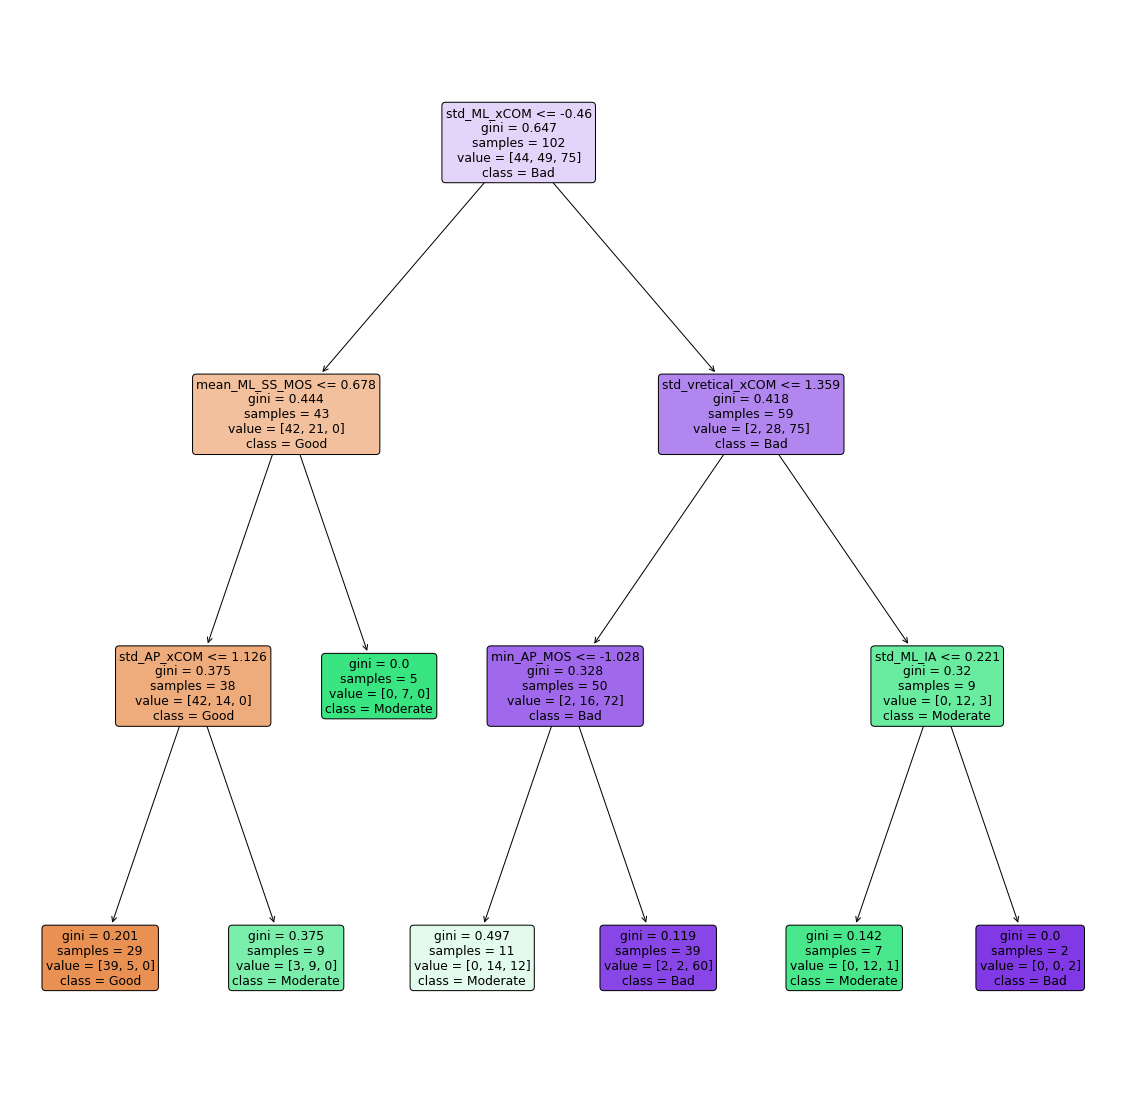

In [283]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(adv_RF_best_reg.estimators_[0], 
              feature_names=list(adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [284]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [285]:
acc_3_t = accuracy_score(y_test.ravel(), adv_SVC_best_reg.predict(adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), adv_SVC_best_reg.predict(adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("advanced SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

advanced SVC
acc: 0.75
recall: 0.685
precision: 0.693


Text(0.5, 1.0, 'SVC confusion matrix')

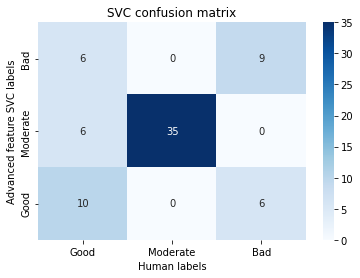

In [286]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), adv_SVC_best_reg.predict(adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), adv_SVC_best_reg.predict(adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Advanced feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [287]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Advanced feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Advanced feature SVC Sensitivity: 
 Good prediction: 45.45454545454545 
 Moderate prediction 100.0 
 Bad prediction 60.0


In [288]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Advanced feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Advanced feature SVC Precision: 
 Good prediction: 62.5 
 Moderate prediction 85.36585365853658 
 Bad prediction 60.0


In [289]:
acc_3_t = accuracy_score(y_test.ravel(), adv_DT_best_reg.predict(adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), adv_DT_best_reg.predict(adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("advanced DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

advanced DT
acc: 0.625
recall: 0.572
precision: 0.601


Text(0.5, 1.0, 'DT confusion matrix')

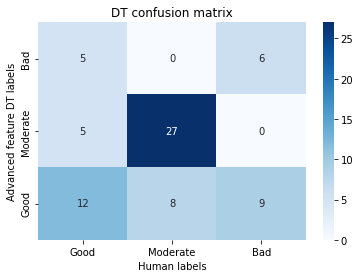

In [290]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), adv_DT_best_reg.predict(adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), adv_DT_best_reg.predict(adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Advanced feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [291]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Advanced feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Advanced feature DT Sensitivity: 
 Good prediction: 54.54545454545454 
 Moderate prediction 77.14285714285715 
 Bad prediction 40.0


In [292]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Advanced feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Advanced feature DT Precision: 
 Good prediction: 41.37931034482759 
 Moderate prediction 84.375 
 Bad prediction 54.54545454545454


In [293]:
acc_3_t = accuracy_score(y_test.ravel(), adv_RF_best_reg.predict(adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), adv_RF_best_reg.predict(adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("advanced RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

advanced RF
acc: 0.736
recall: 0.711
precision: 0.711


Text(0.5, 1.0, 'RF confusion matrix')

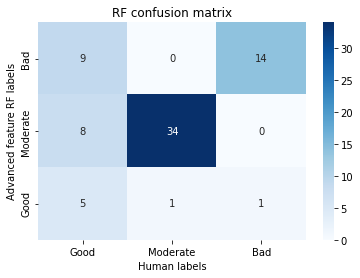

In [294]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), adv_RF_best_reg.predict(adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), adv_RF_best_reg.predict(adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Advanced feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [295]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Advanced feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Advanced feature RF Sensitivity: 
 Good prediction: 22.727272727272727 
 Moderate prediction 97.14285714285714 
 Bad prediction 93.33333333333333


In [296]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Advanced feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Advanced feature RF Precision: 
 Good prediction: 71.42857142857143 
 Moderate prediction 80.95238095238095 
 Bad prediction 60.86956521739131


In [376]:
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn import metrics

In [377]:
onehot_targets = onehotencoder.transform(y_test.reshape(-1, 1)).toarray()
targets_bad = onehot_targets[:,0]

In [378]:
all_predictions = all_RF_best_reg.predict_proba(all_x_test)
all_predictions_bad = all_predictions[:,0]
spa_predictions = spa_RF_best_reg.predict_proba(spa_x_test)
spa_predictions_bad = spa_predictions[:,0]
cop_predictions = COP_RF_best_reg.predict_proba(cop_x_test)
cop_predictions_bad = cop_predictions[:,0]
adv_predictions = adv_RF_best_reg.predict_proba(adv_x_test)
adv_predictions_bad = adv_predictions[:,0]

In [384]:
all_fpr, all_tpr, all_thresholds = roc_curve(targets_bad, all_predictions_bad)
spa_fpr, spa_tpr, spa_thresholds = roc_curve(targets_bad, spa_predictions_bad)
cop_fpr, cop_tpr, cop_thresholds = roc_curve(targets_bad, cop_predictions_bad)
adv_fpr, adv_tpr, adv_thresholds = roc_curve(targets_bad, adv_predictions_bad)

In [385]:
all_auc = metrics.auc(all_fpr, all_tpr)
spa_auc = metrics.auc(spa_fpr, spa_tpr)
cop_auc = metrics.auc(cop_fpr, cop_tpr)
adv_auc = metrics.auc(adv_fpr, adv_tpr)

Text(0, 0.5, 'True positive rate (bad steps)')

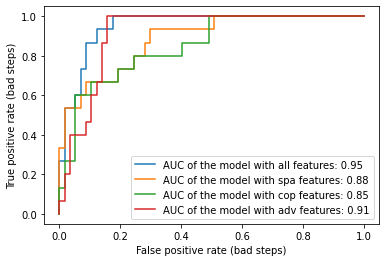

In [390]:
all_label = "AUC of the model with all features: " + str(round(all_auc, 2))
spa_label = "AUC of the model with spa features: " + str(round(spa_auc, 2))
cop_label = "AUC of the model with cop features: " + str(round(cop_auc, 2))
adv_label = "AUC of the model with adv features: " + str(round(adv_auc, 2))

plt.plot(all_fpr,all_tpr,  label = all_label)
plt.plot(spa_fpr,spa_tpr,  label = spa_label)
plt.plot(cop_fpr,cop_tpr,  label = cop_label)
plt.plot(adv_fpr,adv_tpr,  label = adv_label)

plt.legend(loc = "lower right")
plt.xlabel("False positive rate (bad steps)")
plt.ylabel("True positive rate (bad steps)")

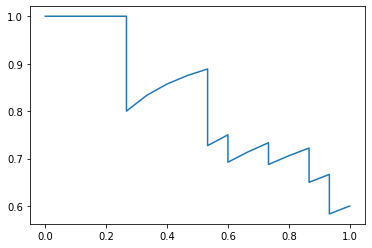

In [370]:
plt.plot(all_recall, all_precision, label = all_label)

In [396]:
all_thresholds

array([1.7755097 , 0.7755097 , 0.68093014, 0.63331987, 0.56614551,
       0.55008207, 0.53958219, 0.53778374, 0.51654067, 0.51241606,
       0.50412482, 0.4884589 , 0.4869316 , 0.44652521, 0.4366526 ,
       0.00746591])

array([1.71022653, 0.71022653, 0.50962135, 0.48905599, 0.46191968,
       0.43905905, 0.43741484, 0.43689914, 0.40966215, 0.35117038,
       0.34202465, 0.32882562, 0.31375668, 0.3085589 , 0.30383952,
       0.29235373, 0.27252799, 0.20888954, 0.17965291, 0.01240137])

array([0.        , 0.        , 0.        , 0.01754386, 0.01754386,
       0.05263158, 0.05263158, 0.07017544, 0.07017544, 0.0877193 ,
       0.0877193 , 0.12280702, 0.12280702, 0.1754386 , 0.1754386 ,
       1.        ])

array([0.71022653, 0.3791317 , 0.22836234, 0.06982235, 0.09483234,
       0.03130801, 0.51166873, 0.24990489, 0.3357213 , 0.0632244 ,
       0.31375668, 0.08769996, 0.48905599, 0.06858761, 0.12067323,
       0.50962135, 0.23755411, 0.37316405, 0.03877851, 0.0673851 ,
       0.04876336, 0.39707488, 0.47328579, 0.40966215, 0.12309563,
       0.16407802, 0.33990874, 0.21514749, 0.58596328, 0.02332814,
       0.29235373, 0.30383952, 0.17965291, 0.04085217, 0.38338462,
       0.45626389, 0.01364216, 0.34202465, 0.30891803, 0.20888954,
       0.4639528 , 0.2287283 , 0.46191968, 0.35117038, 0.01510045,
       0.43689914, 0.01543735, 0.43741484, 0.32882562, 0.36729634,
       0.0361557 , 0.04920969, 0.04948779, 0.01240137, 0.60111618,
       0.25120857, 0.25393378, 0.27252799, 0.04344612, 0.07179597,
       0.20952819, 0.04481663, 0.05812677, 0.45930837, 0.23481784,
       0.43905905, 0.09584273, 0.3085589 , 0.25379286, 0.01313133,
       0.0238621 , 0.21922779])